# OWID Dataset COVID19 Visual Analysis + ARIMA Modeling

Dataset: Our world in COVID-19
https://github.com/owid/covid-19-data/raw/master/public/
- this dataset is an amalgamate of many government data sources and John Hopkins University Research Center
- Dataset Codebook is available at the above github link

## Project Purpose
- This project is to shed light on the different attributes that may affect COVID spread and fatalities
- The aim is to discover the important trends, and find the most important demographic factors through visual trend analysis
- Another goal of this project is to develop an ARIMA model to forecast cases and deaths for Canada for the next 30 days
- This project will heavily focus on visualizations and exploratory data analysis, with forecasting as the final component
- Note: the data is being updated everyday and some insights may change over time

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from datetime import datetime

import plotly_express as px
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

In [2]:
#Dataset updated daily; obtained from
url = 'https://github.com/owid/covid-19-data/raw/master/public/data/owid-covid-data.csv'

In [3]:
OWIDdf = pd.read_csv(url)

In [4]:
df = OWIDdf.copy()
cf = df.copy() # for dash

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95271 entries, 0 to 95270
Data columns (total 60 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               95271 non-null  object 
 1   continent                              90773 non-null  object 
 2   location                               95271 non-null  object 
 3   date                                   95271 non-null  object 
 4   total_cases                            92162 non-null  float64
 5   new_cases                              92159 non-null  float64
 6   new_cases_smoothed                     91149 non-null  float64
 7   total_deaths                           82167 non-null  float64
 8   new_deaths                             82323 non-null  float64
 9   new_deaths_smoothed                    91149 non-null  float64
 10  total_cases_per_million                91670 non-null  float64
 11  ne

- many non-null values; 59 columns; ~90k entries; 5 object and 53 float
- columns 43 and thereafter are non-time-series variables and are country-related factors or demographics

## Data understanding

In [6]:
#date indexing
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

In [7]:
df.head(10)

iso_code continent     location  total_cases  new_cases  \
date                                                                 
2020-02-24      AFG      Asia  Afghanistan          1.0        1.0   
2020-02-25      AFG      Asia  Afghanistan          1.0        0.0   
2020-02-26      AFG      Asia  Afghanistan          1.0        0.0   
2020-02-27      AFG      Asia  Afghanistan          1.0        0.0   
2020-02-28      AFG      Asia  Afghanistan          1.0        0.0   
2020-02-29      AFG      Asia  Afghanistan          1.0        0.0   
2020-03-01      AFG      Asia  Afghanistan          1.0        0.0   
2020-03-02      AFG      Asia  Afghanistan          1.0        0.0   
2020-03-03      AFG      Asia  Afghanistan          2.0        1.0   
2020-03-04      AFG      Asia  Afghanistan          4.0        2.0   

            new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
date                                                                            
2020-02-24                 NaN           NaN         NaN                  NaN   
2020-02-25                 NaN           NaN         NaN                  NaN   
2020-02-26                 NaN           NaN         NaN                  NaN   
2020-02-27                 NaN           NaN         NaN                  NaN   
2020-02-28                 NaN           NaN         NaN                  NaN   
2020-02-29               0.143           NaN         NaN                  0.0   
2020-03-01               0.143           NaN         NaN                  0.0   
2020-03-02               0.000           NaN         NaN                  0.0   
2020-03-03               0.143           NaN         NaN                  0.0   
2020-03-04               0.429           NaN         NaN                  0.0   

            total_cases_per_million  ...  extreme_poverty  \
date                                 ...                    
2020-02-24                    0.026  ...              NaN   
2020-02-25                    0.026  ...              NaN   
2020-02-26                    0.026  ...              NaN   
2020-02-27                    0.026  ...              NaN   
2020-02-28                    0.026  ...              NaN   
2020-02-29                    0.026  ...              NaN   
2020-03-01                    0.026  ...              NaN   
2020-03-02                    0.026  ...              NaN   
2020-03-03                    0.051  ...              NaN   
2020-03-04                    0.103  ...              NaN   

            cardiovasc_death_rate  diabetes_prevalence  female_smokers  \
date                                                                     
2020-02-24                597.029                 9.59             NaN   
2020-02-25                597.029                 9.59             NaN   
2020-02-26                597.029                 9.59             NaN   
2020-02-27                597.029                 9.59             NaN   
2020-02-28                597.029                 9.59             NaN   
2020-02-29                597.029                 9.59             NaN   
2020-03-01                597.029                 9.59             NaN   
2020-03-02                597.029                 9.59             NaN   
2020-03-03                597.029                 9.59             NaN   
2020-03-04                597.029                 9.59             NaN   

            male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
date                                                                           
2020-02-24           NaN                  37.746                         0.5   
2020-02-25           NaN                  37.746                         0.5   
2020-02-26           NaN                  37.746                         0.5   
2020-02-27           NaN                  37.746                         0.5   
2020-02-28           NaN                  37.746                         0.5   
2020-02-29     

In [8]:
df.location.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

Location labels include continents, world(average), countries, districts.

In [9]:
df.tests_units.unique()

array([nan, 'tests performed', 'people tested', 'units unclear',
       'samples tested'], dtype=object)

units used by location to report testing data

In [10]:
df.index.min() #first date of data collection

Timestamp('2020-01-01 00:00:00')

- due to the data being relatively recent, with varying underreporting rates by region, some data is unavailable, especially during the earlier dates
- some columns have less than 10000 non-null values but are still useful for visual analysis. ie. new vaccinations

In [11]:
df.describe()
#many nonsensical negative values like -min in new_deaths columns
#may be due to discrepancies in reporting the total cases/deaths

total_cases      new_cases  new_cases_smoothed  total_deaths  \
count  9.216200e+04   92159.000000        91149.000000  8.216700e+04   
mean   9.901983e+05    6059.070856         6085.787031  2.720441e+04   
std    6.816558e+06   38060.917993        37808.232240  1.620633e+05   
min    1.000000e+00  -74347.000000        -6223.000000  1.000000e+00   
25%    1.160000e+03       2.000000            7.286000  5.100000e+01   
50%    1.268350e+04      72.000000           90.286000  3.550000e+02   
75%    1.335702e+05     798.000000          837.571000  3.480000e+03   
max    1.756582e+08  906008.000000       826389.571000  3.795035e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  82323.000000         91149.000000             91670.000000   
mean     147.201766           131.788558             12171.666579   
std      805.109777           744.497635             22712.788840   
min    -1918.000000          -232.143000                 0.001000   
25%        0.000000             0.000000               242.878000   
50%        2.000000             1.286000              1641.918000   
75%       18.000000            14.286000             12395.397500   
max    18050.000000         14737.000000            178774.348000   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           91667.000000                    90662.000000   
mean               76.141398                       76.450788   
std               198.432444                      158.773072   
min             -2153.437000                     -276.825000   
25%                 0.207000                        1.259000   
50%                 8.130000                       10.772500   
75%                70.668500                       79.242750   
max             18293.675000                     4083.500000   

       total_deaths_per_million  ...  extreme_poverty  cardiovasc_death_rate  \
count              81688.000000  ...     57893.000000           85767.000000   
mean                 272.478797  ...        13.389408             258.278836   
std                  497.530122  ...        19.955057             118.949415   
min                    0.001000  ...         0.100000              79.370000   
25%                    7.772000  ...         0.600000             167.295000   
50%                   48.258000  ...         2.200000             242.648000   
75%                  295.152000  ...        21.200000             329.635000   
max                 5704.867000  ...        77.600000             724.417000   

       diabetes_prevalence  female_smokers  male_smokers  \
count         87842.000000    67123.000000  66140.000000   
mean              7.906109       10.553405     32.683031   
std               4.113899       10.446446     13.479578   
min               0.990000        0.100000      7.700000   
25%               5.310000        1.900000     21.600000   
50%               7.110000        6.300000     31.400000   
75%              10.080000       19.300000     41.100000   
max              30.530000       44.000000     78.100000   

       handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
count            43093.000000                78175.000000     90467.000000   
mean                50.856180                    3.028578        73.230768   
std                 31.760344                    2.460140         7.561663   
min                  1.188000                    0.100000        53.280000   
25%                 19.351000                    1.300000        67.920000   
50%                 49.839000                    2.400000        74.620000   
75%                 83.241000                    3.861000        78.740000   
max                100.000000                   13.800000        86.750000   

       human_development_index  excess_mortality  
count             85932.000000       3406.000000  
mean                  0.727565         18.247719  
std                   0.150382         36.

## Distributions 

In [16]:
today = str(datetime.today().date())

df_recent = df.loc['2021-05-20'] #some countries may not be up to date if calling today()
df_recent.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 223 entries, 2021-05-20 to 2021-05-20
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               223 non-null    object 
 1   continent                              214 non-null    object 
 2   location                               223 non-null    object 
 3   total_cases                            201 non-null    float64
 4   new_cases                              200 non-null    float64
 5   new_cases_smoothed                     200 non-null    float64
 6   total_deaths                           193 non-null    float64
 7   new_deaths                             193 non-null    float64
 8   new_deaths_smoothed                    200 non-null    float64
 9   total_cases_per_million                200 non-null    float64
 10  new_cases_per_million                  199 non-null    

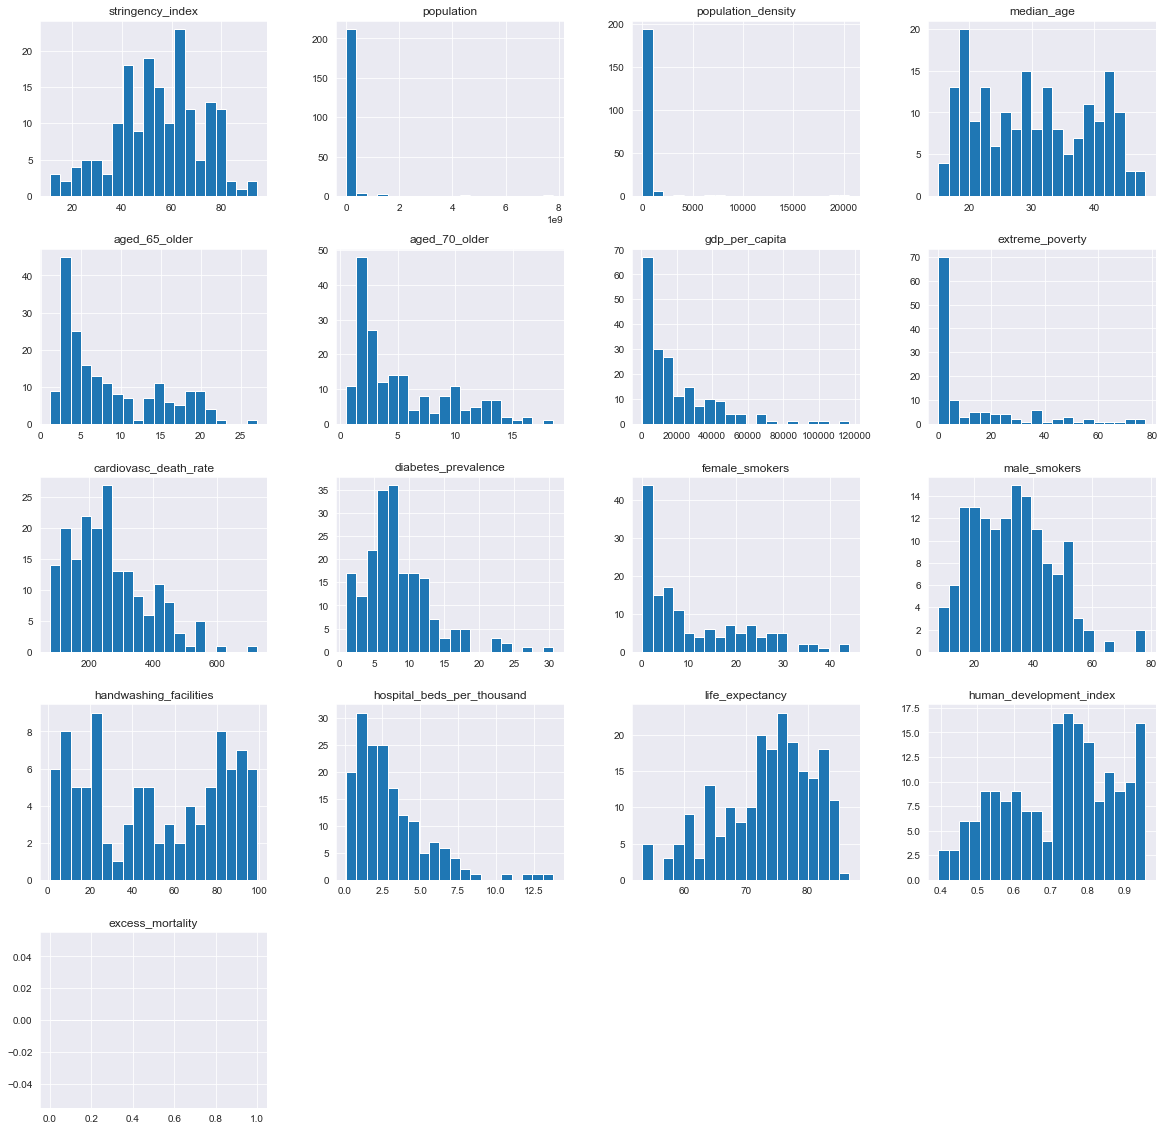

In [17]:
#non-time series data
df_recent.iloc[:, 42:].hist(bins=20, figsize=(20,20))
plt.show()

- population and population density are heavily skewed

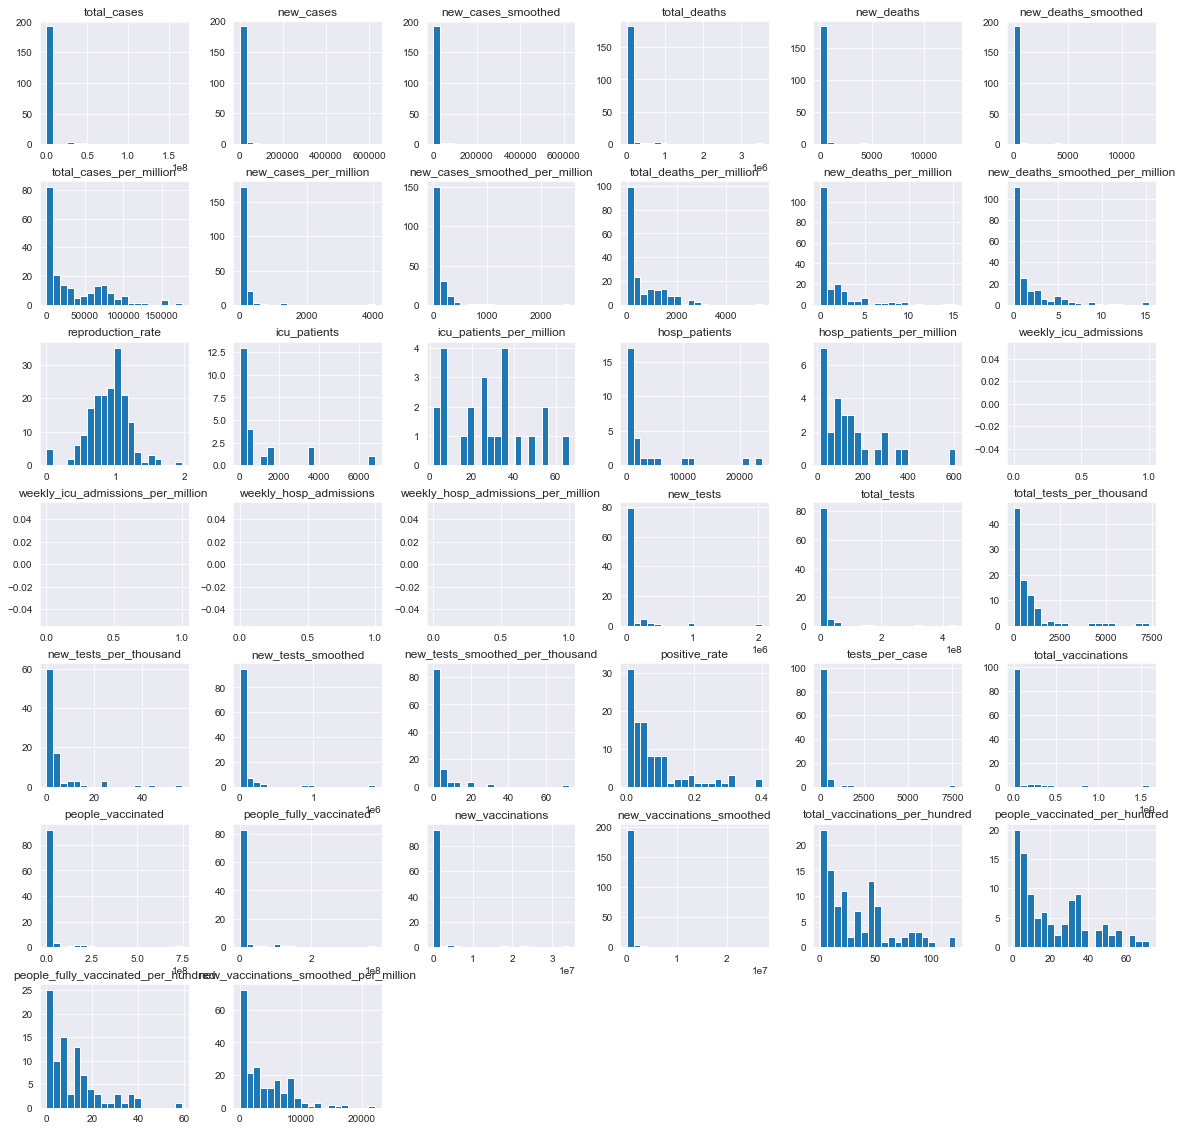

In [18]:
#time series data
df_recent.iloc[:, :42].hist(bins=20, figsize=(20,20))
plt.show()

In [19]:
from pandas_profiling import ProfileReport

In [29]:
profile = ProfileReport(df, title='OWID COVID19 data summary')

In [30]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/73 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [31]:
profile.to_file("COVID19_Report.html")

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Feature Generation
- Crude Mortality : total COVID19 Deaths / total population
- Case Fatality : total COVID19 Deaths / Confirmed COVID19 cases
    - OWID states this metric may be innacurate due to not knowing true confirmed COVID19 cases 

In [19]:
#Crude Mortality
df['crude_mortality'] = df.total_deaths / df.population

In [20]:
#CFR
df['case_fatality'] = df.total_deaths / df.total_cases

In [21]:
aggdf = df.groupby('location').agg(['max']) #max finds most recent total_column data regardless of date
aggdf.columns = aggdf.columns.droplevel(1)
aggdf.reset_index(inplace=True)

In [22]:
CM_CFR_view = aggdf.sort_values(by='crude_mortality', ascending=False)[['location','crude_mortality','case_fatality']].dropna()
CM_CFR_view

location  crude_mortality  case_fatality
163                    Peru     5.656674e-03       1.000000
93                  Hungary     3.091606e-03       0.141134
27   Bosnia and Herzegovina     2.868495e-03       0.062145
54                  Czechia     2.816701e-03       0.035402
176              San Marino     2.651895e-03       0.138889
..                      ...              ...            ...
24                   Bhutan     1.295988e-06       0.001297
34                  Burundi     6.727901e-07       0.200000
223                 Vietnam     5.444912e-07       0.033461
114                    Laos     4.123396e-07       0.001575
202                Tanzania     3.515573e-07       0.093750

[192 rows x 3 columns]

# Exploring the Time-Series Data
- this dataset has non-time series variables at column 43 and afterward
- target variables are deaths and cases
    - note the difference in population scales, in which case total_deaths_per_million is used

## COVID19 Globally 

In [24]:
#single plot
def create_ts(country='World', feature='new_cases_smoothed', **kwargs):
    
    fig, ax = plt.subplots(figsize=(13,5))
        
    ax.plot(df[df.location==country][feature],
           linestyle=line, 
           label=feature,
           c=c)
    ax.set(xlabel = '',
          ylabel='Cases',
          title = f'{feature} in {country} from {df.index.min().date()} to {df.index.max().date()}')
    ax.legend(fontsize='x-large')

In [25]:
#subplot 
def subplot_ts(country='World', feature='new_cases_smoothed', ax=None, **kwargs):
    ax = ax or plt.gca()
    
    ax.plot(df[df.location==country][feature], label=feature, **kwargs)
    ax.legend(fontsize='large')
    return ax

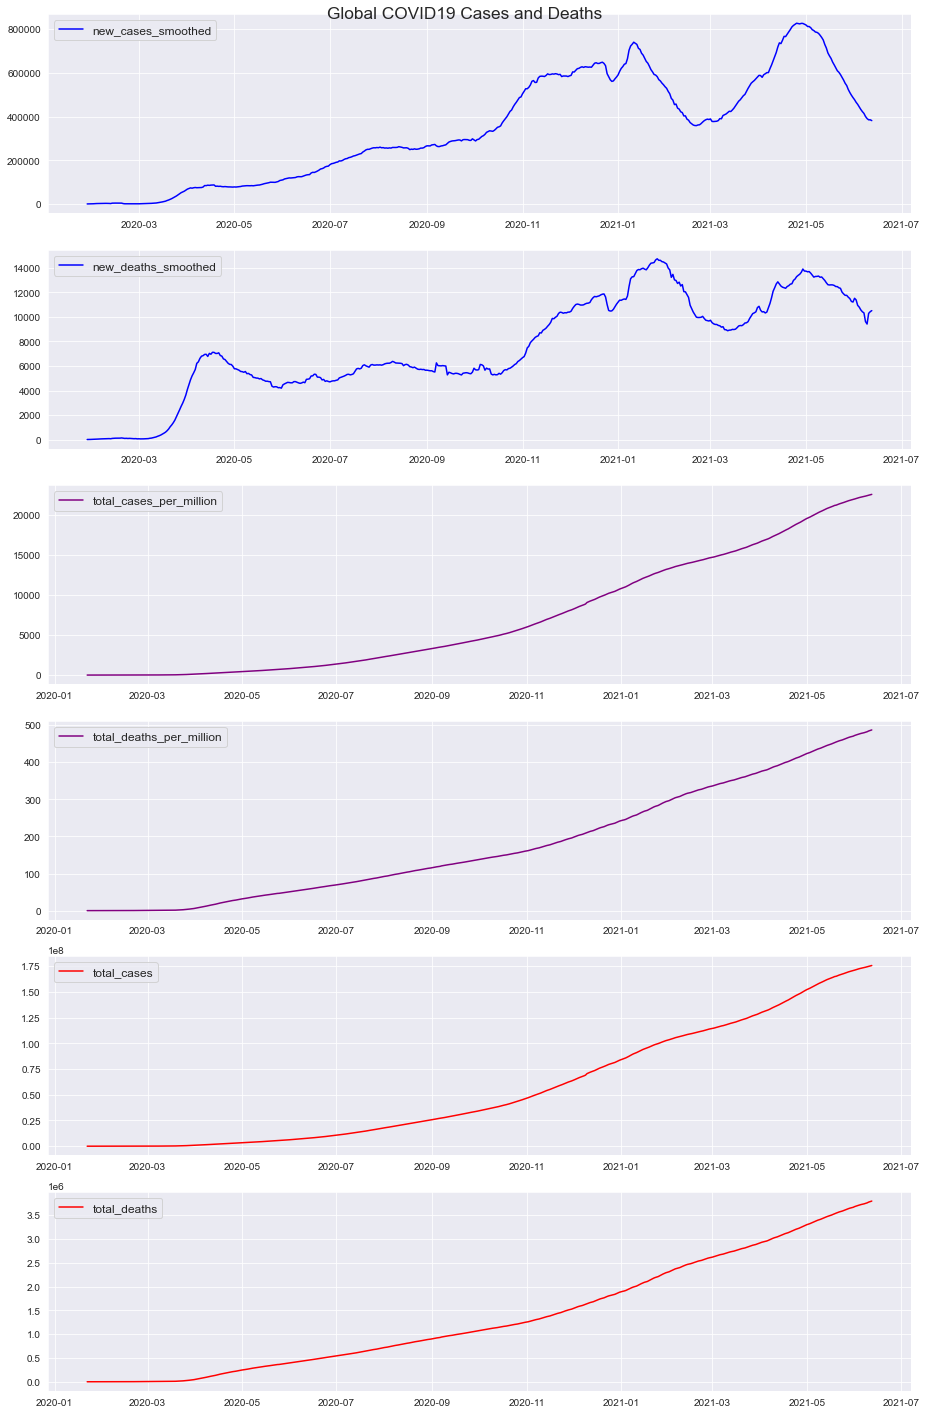

In [26]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, figsize=(13,20))

subplot_ts(feature='new_cases_smoothed', ax=ax1, color='blue')
subplot_ts(feature='new_deaths_smoothed', ax=ax2, color='blue')
subplot_ts(feature='total_cases_per_million', ax=ax3, color='purple')    
subplot_ts(feature='total_deaths_per_million', ax=ax4, color='purple')
subplot_ts(feature='total_cases', ax=ax5, color='red')
subplot_ts(feature='total_deaths', ax=ax6, color='red')
fig.suptitle('Global COVID19 Cases and Deaths', fontsize='xx-large')
plt.tight_layout()

## By Continent

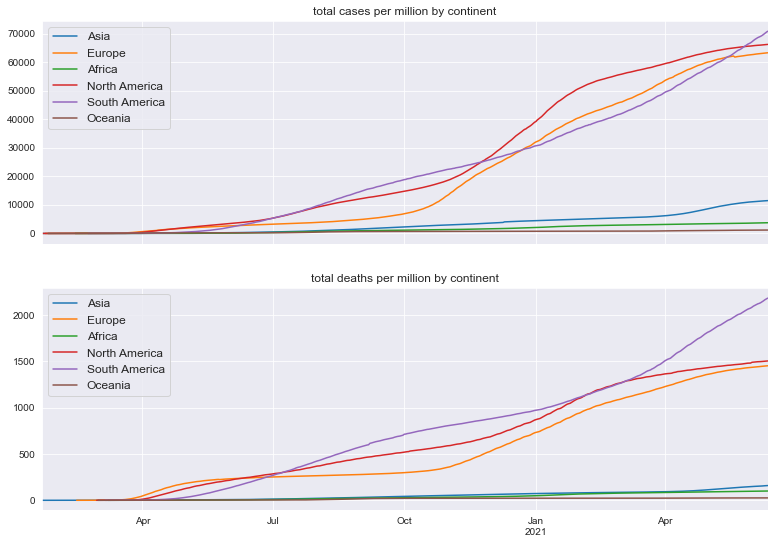

In [28]:
fig, ax = plt.subplots(2, 1, figsize=(13,9), sharex=True)

continents = [x for x in df.continent.unique() if str(x) != 'nan']

for i in continents:
    for x, y in enumerate([df[df.location==i].total_cases_per_million]):
        y.plot(ax=ax[0], linestyle='-')
ax[0].set(xlabel = '', title = 'total cases per million by continent')  
ax[0].legend(continents, fontsize='large')

for i in continents:
    for x, y in enumerate([df[df.location==i].total_deaths_per_million]):
        y.plot(ax=ax[1], linestyle='-')
ax[1].set(xlabel = '', title = 'total deaths per million by continent') 
ax[1].legend(continents, loc='upper left',fontsize= 'large')

plt.show()

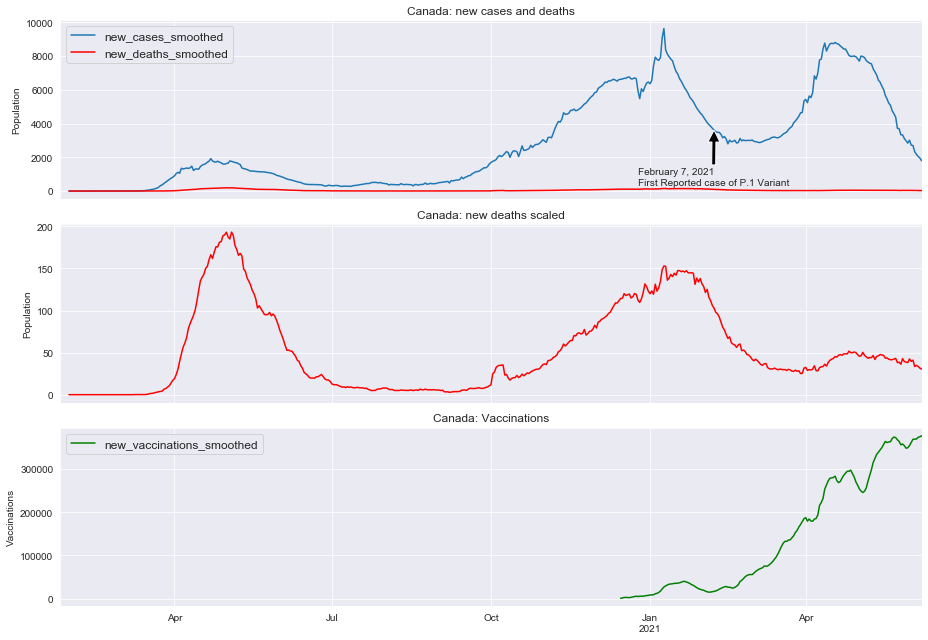

In [27]:
#lets take a look at Canada
odf_canada = df[df.location=='Canada']

fig, ax = plt.subplots(3, 1, figsize=(13,9), sharex=True)
for x, y in enumerate([odf_canada.new_cases_smoothed]):
    y.plot(ax=ax[0], linestyle='-')
for x, y in enumerate([odf_canada.new_deaths_smoothed]):
    y.plot(ax=ax[0], linestyle='-', color='r')
for x, y in enumerate([odf_canada.new_deaths_smoothed]):
    y.plot(ax=ax[1], linestyle='-', color='r')
for x, y in enumerate([odf_canada.new_vaccinations_smoothed]):
    y.plot(ax=ax[2], linestyle='-', color='g')  

ax[0].set(xlabel = '', ylabel='Population', title = 'Canada: new cases and deaths')
ax[0].legend(loc='upper left', fontsize='large')
ax[0].annotate('February 7, 2021\nFirst Reported case of P.1 Variant',
               xy=('2021-02-07', odf_canada.new_cases_smoothed['2021-02-07']),
               xycoords = 'data', xytext=('2020-12-25',1400),
               arrowprops=dict(facecolor='black'),
               horizontalalignment='left',
               verticalalignment='top')

ax[1].set(xlabel = '', ylabel='Population', title = 'Canada: new deaths scaled')

ax[2].set(xlabel = '', ylabel='Vaccinations', title = 'Canada: Vaccinations')
ax[2].legend(loc='upper left', fontsize='large')

plt.tight_layout()

- entering the 3rd wave of the pandemic in april which may have been affected by variants
- vaccine rollout still gaining

## Vaccinations vs Deaths
- vaccines rollouts 
- the effects of large scale vaccinations will take a longer time-frame to visualize a clear effect

In [30]:
def vtplot(case='Canada'):
    
    fig, host = plt.subplots(figsize=(12,6))
    par1 = host.twinx()
    par1.set_ylim(auto=True)

    host.set_ylabel('Total cases and vaccinations', fontsize=14)
    par1.set_ylabel('Total deaths', fontsize=14)

    for x, y in enumerate([df[df.location==case].total_cases.dropna()]):
        y.plot(ax=host, linestyle='-')
    for x, y in enumerate([df[df.location==case].total_deaths.dropna()]):
        y.plot(ax=par1, linestyle='--', color = 'r')
    for x, y in enumerate([df[df.location==case].total_vaccinations.dropna()]):
        y.plot(ax=host, linestyle='-', color='g')
    host.legend(labels=['total_cases','total_vaccinations'], loc='upper left', fontsize='x-large')
    par1.legend(labels=['total_deaths'], loc='upper right', fontsize='x-large')

    host.set_title(case, fontsize='xx-large')

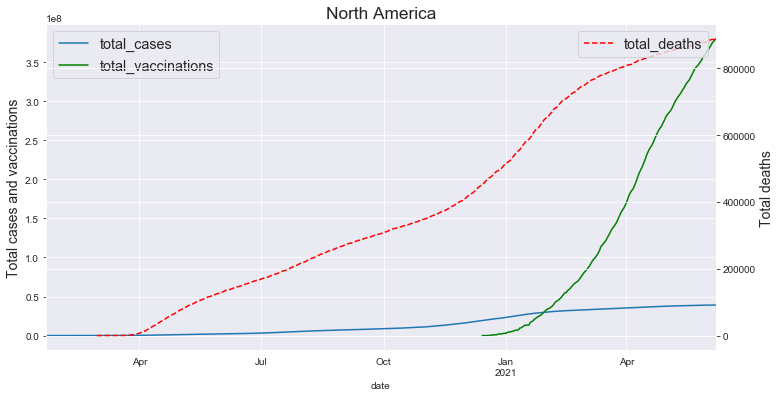

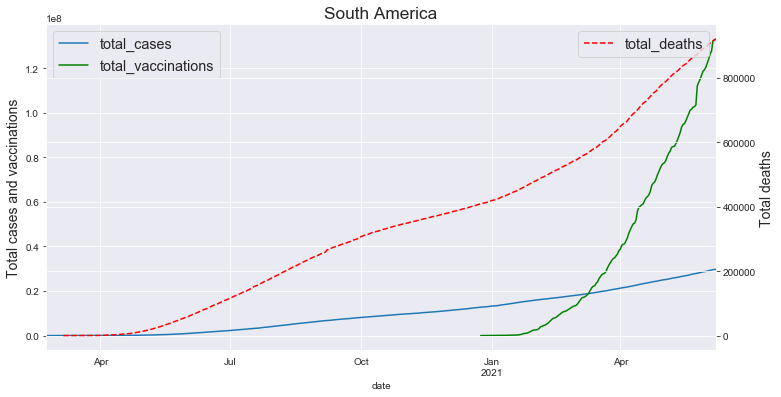

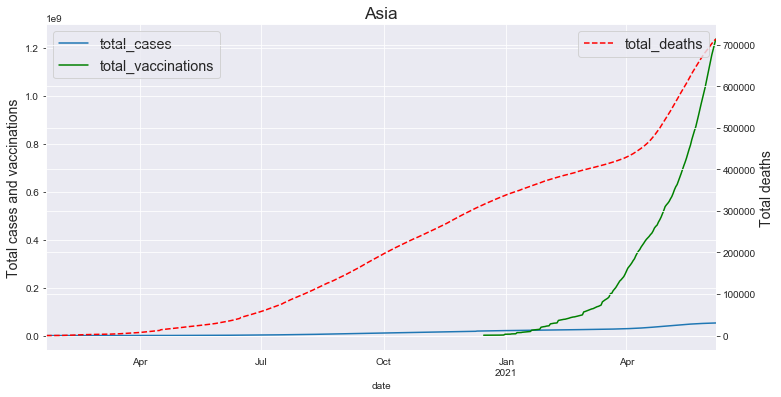

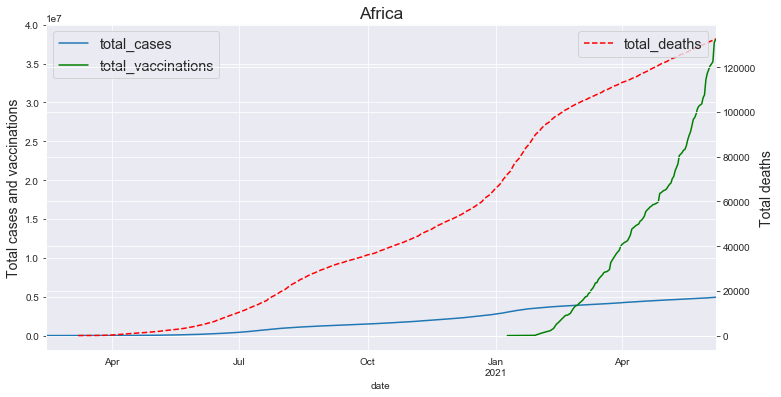

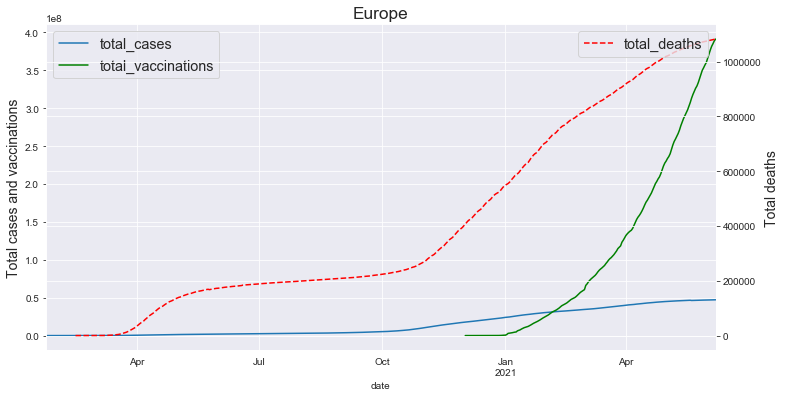

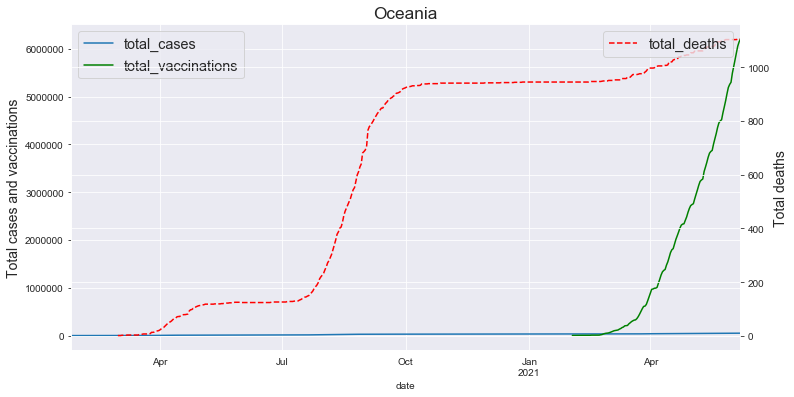

In [31]:
vtplot('North America')
vtplot('South America')
vtplot('Asia')
vtplot('Africa')
vtplot('Europe')
vtplot('Oceania')

#Note the separate axis from total deaths on the right

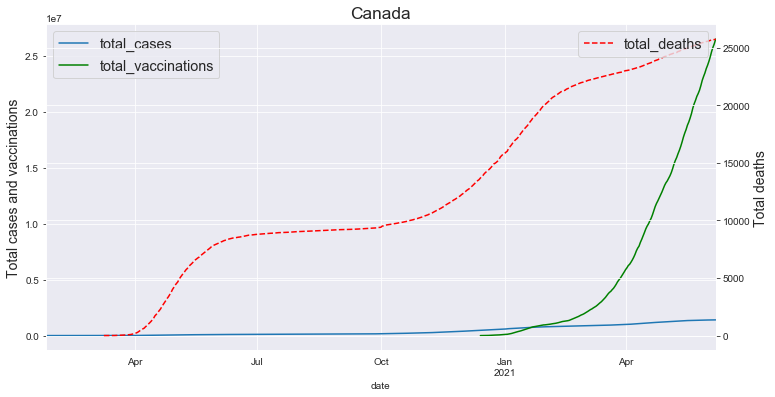

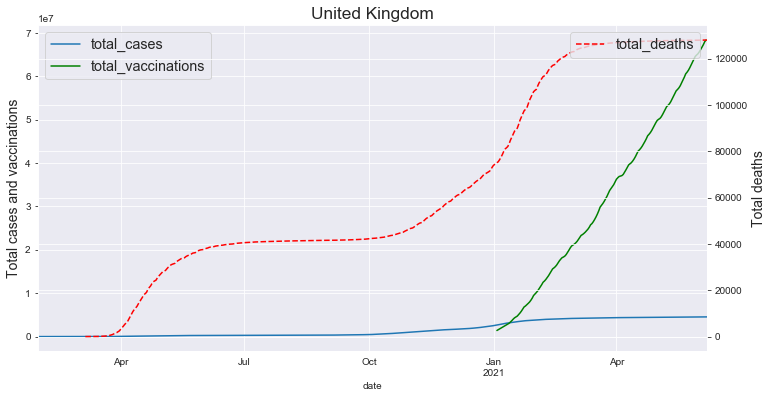

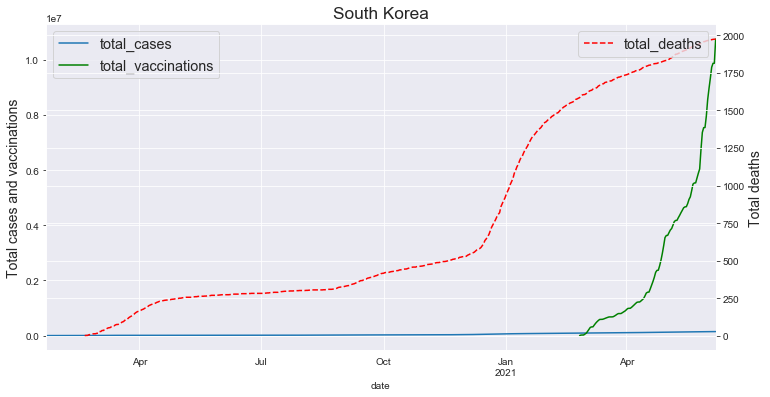

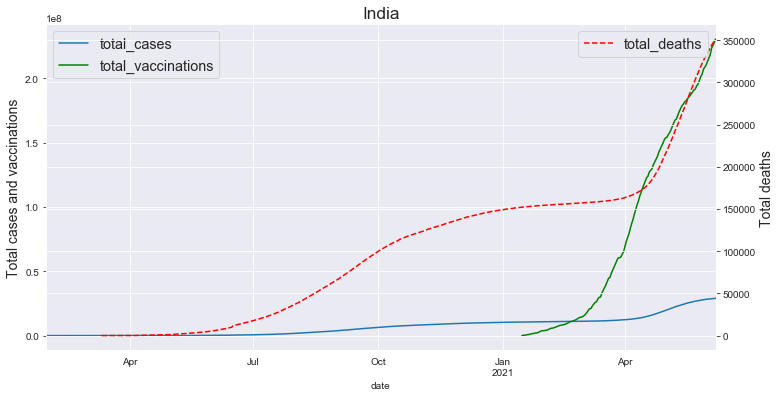

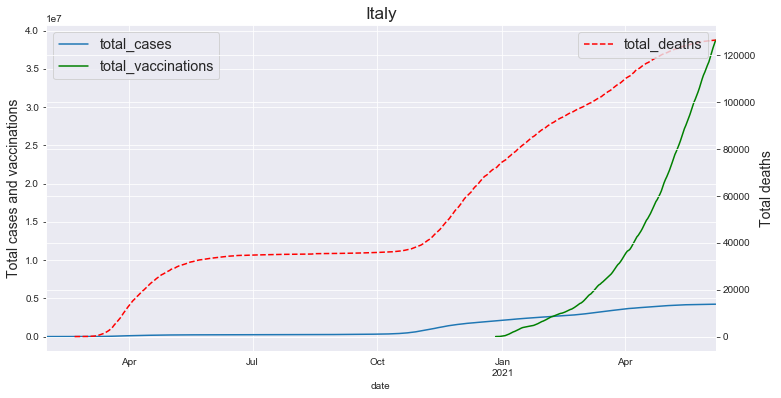

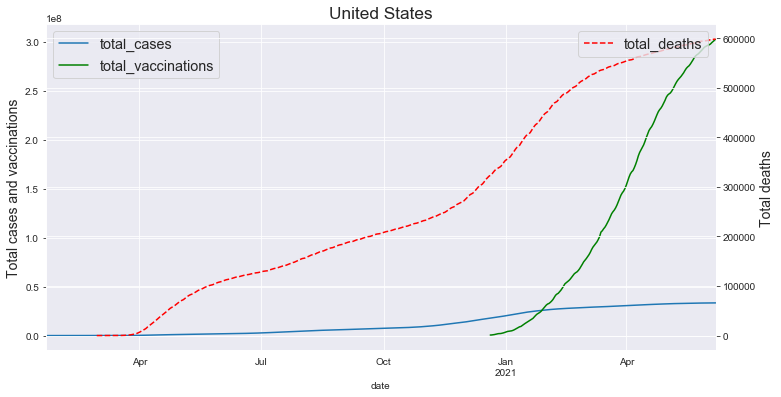

In [32]:
vtplot('Canada')
vtplot('United Kingdom')
vtplot('South Korea')
vtplot('India')
vtplot('Italy')
vtplot('United States')

- some cases of plateauing with higher vaccine count, especially in United States with a successful vaccine rollout

## Chloropleth visualizations
- using plotly express for interactive visualizations

In [33]:
import plotly_express as px

In [34]:
odf_nocontinent = df[-df.location.isin(['World','European Union','North America',
                                        'South America','Asia','Africa','Europe','Oceania'])] # Removing Continents
#only take the max of each grouping
odf_totalcases = odf_nocontinent.groupby(odf_nocontinent['location']).agg(['max'])
odf_totalcases.columns = odf_totalcases.columns.droplevel(1)

## total_cases and total_deaths

In [35]:
#Total Cases
fig = px.choropleth(odf_totalcases, locations='iso_code',
                    color='total_cases',
                    hover_name=odf_totalcases.index, 
                    color_continuous_scale=px.colors.sequential.deep)
fig.update_geos(fitbounds='locations', visible=False)
fig.show()

In [36]:
#Total Deaths
fig = px.choropleth(odf_totalcases, locations='iso_code',
                    color='total_deaths',
                    hover_name=odf_totalcases.index, 
                    hover_data=['population_density','stringency_index','human_development_index'],
                    color_continuous_scale=px.colors.sequential.deep)
fig.update_geos(fitbounds='locations', visible=False)
fig.show()

## Life expectancy

In [37]:
fig = px.choropleth(odf_totalcases, locations='iso_code',
                    color=odf_totalcases.life_expectancy,
                    hover_name=odf_totalcases.index, 
                    color_continuous_scale=px.colors.diverging.curl,
                    color_continuous_midpoint=20)
fig.update_geos(fitbounds='locations', visible=False)
fig.show()

## Median Age
- median age may be an important factor in determining how fatal the virus will be on populations
- generally, populations with higher median age are at risk for a higher crude mortality, ie. Italy, Spain, Portugal
- however, countries like Japan, even while having one of the highest median ages do not have the same death rate within their population cohort

In [38]:
fig = px.choropleth(odf_totalcases, locations='iso_code',
                    color=odf_totalcases.median_age,
                    hover_name=odf_totalcases.index, 
                    color_continuous_scale=px.colors.diverging.curl,
                    color_continuous_midpoint=20)
fig.update_geos(fitbounds='locations', visible=False)
fig.show()

In [39]:
odf_ma40 = odf_totalcases[odf_totalcases.median_age>40]
odf_ma20 = odf_totalcases[odf_totalcases.median_age<20]

top5_ma = odf_totalcases.sort_values(by='median_age', ascending=False).head(5).index.tolist()
bot5_ma = odf_totalcases.sort_values(by='median_age', ascending=True).head(5).index.tolist()

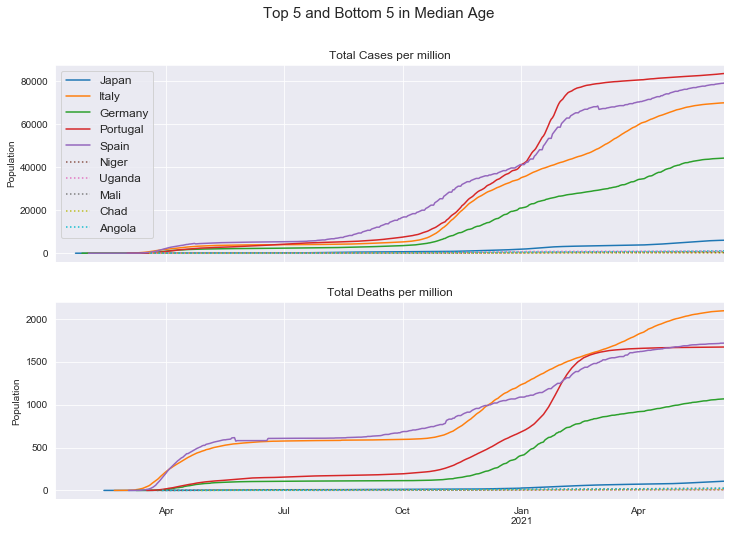

In [40]:
fig, ax = plt.subplots(2,1,figsize=(12,8), sharex=True)

for i in top5_ma:
    for x, y in enumerate([df[df.location==i].total_cases_per_million]):
        y.plot(ax=ax[0], linestyle='-')
for i in bot5_ma:
    for x, y in enumerate([df[df.location==i].total_cases_per_million]):
        y.plot(ax=ax[0], linestyle='dotted')
        
for i in top5_ma:
    for x, y in enumerate([df[df.location==i].total_deaths_per_million]):
        y.plot(ax=ax[1], linestyle='-')
for i in bot5_ma:
    for x, y in enumerate([df[df.location==i].total_deaths_per_million]):
        y.plot(ax=ax[1], linestyle='dotted')

ax[0].set(xlabel = '', ylabel='Population', title='Total Cases per million')
#ax[0].set_title('Total Cases per million',fontsize=20)
ax[0].legend(top5_ma+bot5_ma, fontsize='large')
ax[1].set(xlabel = '', ylabel='Population', title='Total Deaths per million')  
#ax[1].set_title('Total Deaths per million',fontsize=20)
fig.suptitle('Top 5 and Bottom 5 in Median Age', fontsize=15)

plt.show()

- Even though japan has the highest median age, they are among the lowest deaths in their population median age cohort 

## Stringency Index
- composite index measuring how strict a region's government response was
- takes into account stay-at-home-orders, public, private closures and travel bans
- High stringency index : strict governing, policies, enforcement, curfews
- Low stringency index : 'laissez-faire' style response

In [41]:
zf = pd.DataFrame(df.groupby(by=['iso_code', 'location']).agg(['mean']))
zf.reset_index(inplace=True)
zf.columns = zf.columns.droplevel(1)

In [42]:
fig = px.choropleth(odf_totalcases, locations='iso_code',
                    color='stringency_index',
                    hover_name=odf_totalcases.index, 
                    color_continuous_scale=px.colors.sequential.deep,
                    title='Maximum Stringency')
fig.update_geos(fitbounds='locations', visible=False)
fig.show()

In [43]:
fig = px.choropleth(zf, locations='iso_code',
                    color='stringency_index',
                    hover_name='location', 
                    color_continuous_scale=px.colors.sequential.deep, title='Average Stringency')
fig.update_geos(fitbounds='locations', visible=False)
fig.show()

In [44]:
print(px.colors.sequential.deep)

['rgb(253, 253, 204)', 'rgb(206, 236, 179)', 'rgb(156, 219, 165)', 'rgb(111, 201, 163)', 'rgb(86, 177, 163)', 'rgb(76, 153, 160)', 'rgb(68, 130, 155)', 'rgb(62, 108, 150)', 'rgb(62, 82, 143)', 'rgb(64, 60, 115)', 'rgb(54, 43, 77)', 'rgb(39, 26, 44)']


In [45]:
top5_si = zf.sort_values(by='stringency_index', ascending=False).head(70).location.tolist()
bot5_si = zf.sort_values(by='stringency_index', ascending=True).head(70).location.tolist()

Text(0.5, 0.98, 'Highest (violet) and Lowest (teal) Stringency Index')

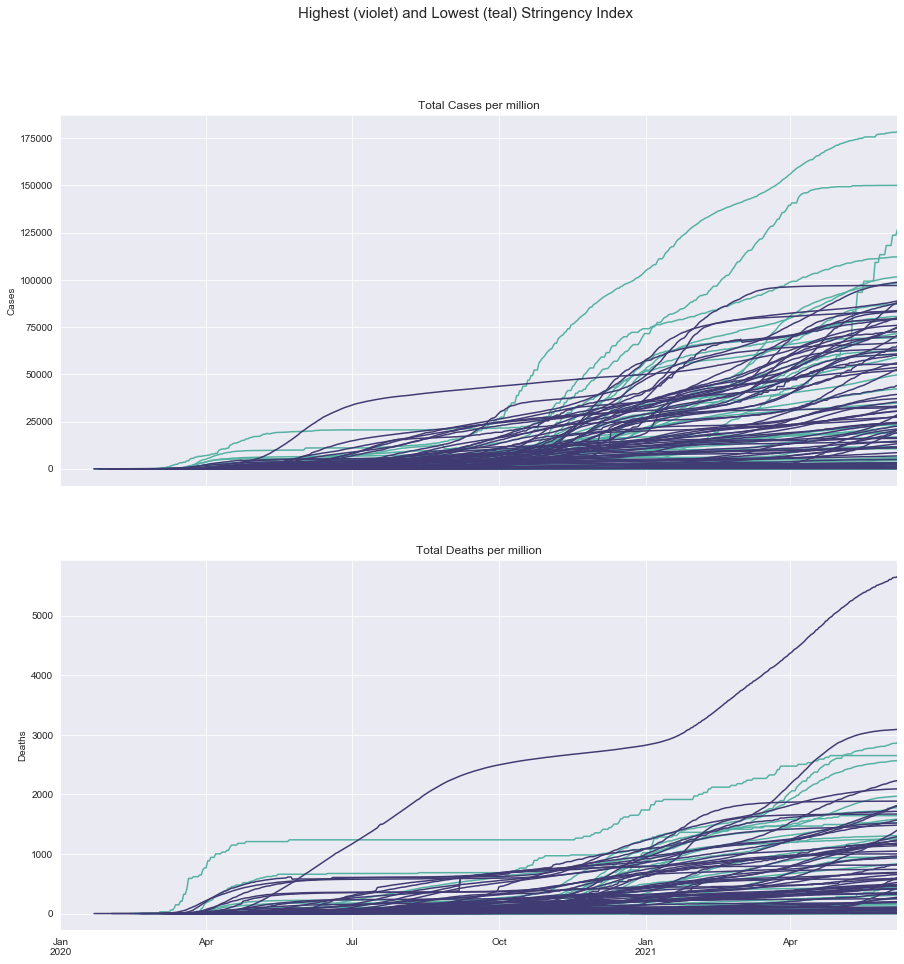

In [46]:
#top/bottom 70 in stringency index
fig, ax = plt.subplots(2,1,figsize=(15,15), sharex=True)

for i in bot5_si:
    for x, y in enumerate([df[df.location==i].total_cases_per_million]):
        y.plot(ax=ax[0], linestyle='-', color='#56b1a3')
for i in top5_si:
    for x, y in enumerate([df[df.location==i].total_cases_per_million]):
        y.plot(ax=ax[0], linestyle='-', color='#403c73')
for i in bot5_si:
    for x, y in enumerate([df[df.location==i].total_deaths_per_million]):
        y.plot(ax=ax[1], linestyle='-', color='#56b1a3')
        #ax[1].annotate(i, xy=(odf.index.max(), odf[odf.location==i].total_deaths_per_million.max()))
for i in top5_si:
    for x, y in enumerate([df[df.location==i].total_deaths_per_million]):
        y.plot(ax=ax[1], linestyle='-', color='#403c73')
        #ax[1].annotate(i, xy=(odf.index.max(), odf[odf.location==i].total_deaths_per_million.max()))
    
ax[0].set(xlabel = '', ylabel='Cases', title='Total Cases per million')
#ax[0].set_title('Total Cases per million',fontsize=20)
#ax[0].legend(top5_si+bot5_si, fontsize='medium')
ax[1].set(xlabel = '', ylabel='Deaths', title='Total Deaths per million')  
#ax[1].set_title('Total Deaths per million',fontsize=20)
fig.suptitle('Highest (violet) and Lowest (teal) Stringency Index', fontsize=15)

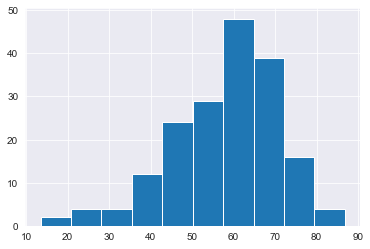

In [47]:
zf.stringency_index.hist()
plt.show()

In [48]:
stringency_up50 = zf[zf.stringency_index > 50]
stringency_down50 = zf[zf.stringency_index < 50]

In [49]:
print(stringency_up50.shape[0], stringency_down50.shape[0])

136 46


Text(0.5, 0.98, 'Highest (violet) and Lowest (teal) Stringency Index')

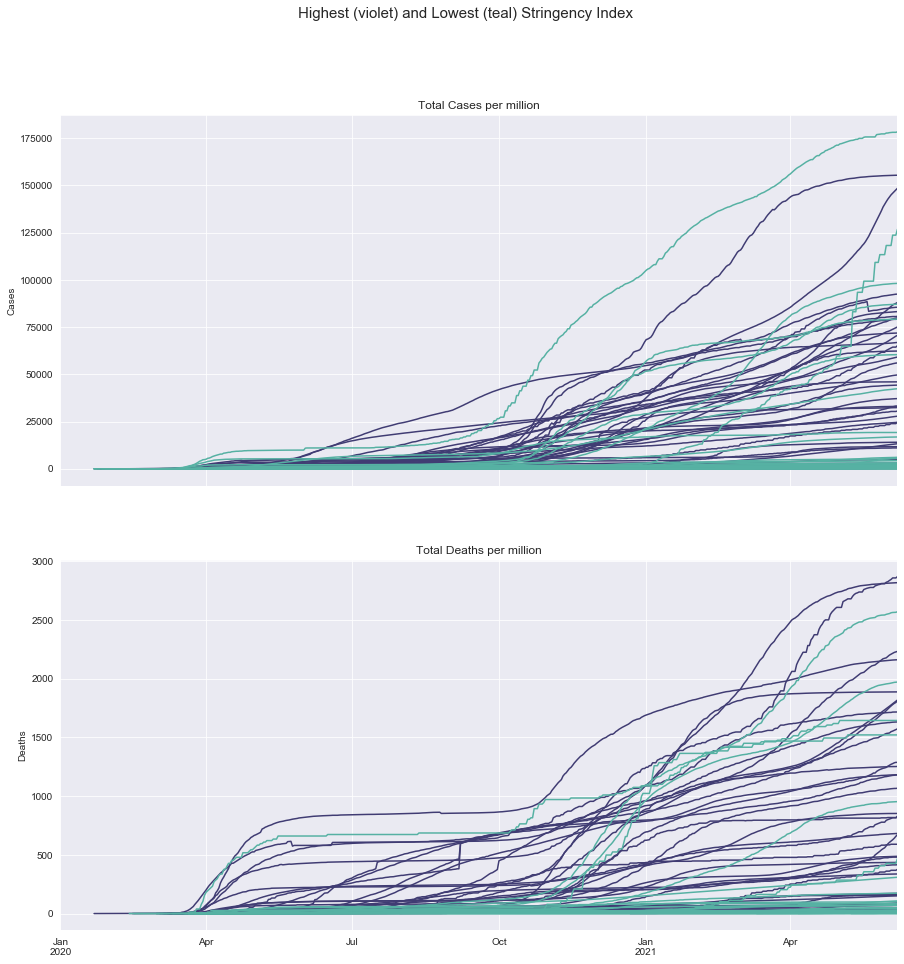

In [50]:
#top/bottom 70 in stringency index
fig, ax = plt.subplots(2,1,figsize=(15,15), sharex=True)

for i in stringency_up50.location.tolist()[:45]:
    for x, y in enumerate([df[df.location==i].total_cases_per_million]):
        y.plot(ax=ax[0], linestyle='-', color='#403c73')
for i in stringency_down50.location.tolist():
    for x, y in enumerate([df[df.location==i].total_cases_per_million]):
        y.plot(ax=ax[0], linestyle='-', color='#56b1a3')
        
for i in stringency_up50.location.tolist()[:45]:
    for x, y in enumerate([df[df.location==i].total_deaths_per_million]):
        y.plot(ax=ax[1], linestyle='-', color='#403c73')
        #ax[1].annotate(i, xy=(odf.index.max(), odf[odf.location==i].total_deaths_per_million.max()))
for i in stringency_down50.location.tolist():
    for x, y in enumerate([df[df.location==i].total_deaths_per_million]):
        y.plot(ax=ax[1], linestyle='-', color='#56b1a3')
        #ax[1].annotate(i, xy=(odf.index.max(), odf[odf.location==i].total_deaths_per_million.max()))

ax[0].set(xlabel = '', ylabel='Cases', title='Total Cases per million')
#ax[0].set_title('Total Cases per million',fontsize=20)
#ax[0].legend(top5_si+bot5_si, fontsize='medium')
ax[1].set(xlabel = '', ylabel='Deaths', title='Total Deaths per million')  
#ax[1].set_title('Total Deaths per million',fontsize=20)
fig.suptitle('Highest (violet) and Lowest (teal) Stringency Index', fontsize=15)

- Stringency index does not seem like a good indicator of COVID19 outcome

In [51]:
#top 10 SI
zf.sort_values(by='stringency_index', ascending=False).head(10)[['location','stringency_index','total_deaths_per_million','total_cases_per_million']]

location  stringency_index  total_deaths_per_million  \
85     Honduras         86.803449                261.424066   
219   Venezuela         85.037146                 29.782509   
59      Eritrea         84.057950                  2.365107   
113       Libya         82.448392                168.242764   
18   Bangladesh         78.697554                 33.739667   
171   Palestine         78.156588                210.732487   
132     Myanmar         77.443364                 27.361212   
42     Colombia         76.892350                656.294515   
12   Azerbaijan         76.454320                163.660560   
164      Panama         75.704042                697.247822   

     total_cases_per_million  
85               9629.128855  
219              2970.935909  
59                356.460126  
113             10275.383440  
18               2242.108103  
171             19006.652500  
132              1217.445950  
42              23416.551503  
12              11770.681759  
164             39154.115666

In [52]:
#bottom 10 SI
zf.sort_values(by='stringency_index', ascending=True).head(10)[['location','stringency_index','total_deaths_per_million','total_cases_per_million']].dropna()

location  stringency_index  total_deaths_per_million  \
145  Nicaragua         13.499305                 19.332413   
13     Burundi         15.038759                  0.190933   
211   Tanzania         21.477060                  0.332134   
222    Vanuatu         24.192020                  3.256000   
210     Taiwan         26.011135                  0.468186   
143      Niger         30.804909                  4.209577   
225      Yemen         33.680542                 20.709186   
23     Belarus         33.745796                125.512410   

     total_cases_per_million  
145               675.803859  
13                103.924509  
211                 7.817127  
222                 6.852667  
210                35.808972  
143               101.731654  
225                80.891800  
23              15672.036661

## Population Density

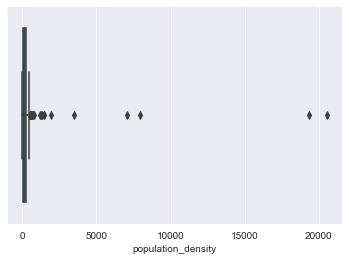

In [55]:
pd_dist = odf_totalcases.sort_values(by='population_density').population_density
sns.boxplot(x = pd_dist)

In [56]:
odf_totalcases.sort_values(by='population_density',ascending=False).head().population_density

location
Macao        20546.766
Monaco       19347.500
Singapore     7915.731
Hong Kong     7039.714
Gibraltar     3457.100
Name: population_density, dtype: float64

In [57]:
#removing top 5 for better distribution
list_pd = odf_totalcases.sort_values('population_density', ascending=False).head(5).index.tolist()
odf2 = odf_totalcases.copy()
odf2.drop(labels=list_pd, axis=0, inplace=True)

In [58]:
odf2.population_density.describe()

count     201.000000
mean      174.480030
std       270.137275
min         0.137000
25%        35.879000
50%        83.479000
75%       208.354000
max      1935.907000
Name: population_density, dtype: float64

In [59]:
fig = px.choropleth(odf2, locations='iso_code',
                    color='population_density',
                    hover_name=odf2.index, 
                    color_continuous_scale=px.colors.sequential.deep)
fig.update_geos(fitbounds='locations', visible=False)
fig.show()

## Hospital beds per thousand
- may act as a mitigator for COVID19 deaths in larger populations

In [60]:
fig = px.choropleth(odf_totalcases, locations='iso_code',
                    color='hospital_beds_per_thousand',
                    hover_name=odf_totalcases.index, 
                    color_continuous_scale=px.colors.sequential.deep)
fig.update_geos(fitbounds='locations', visible=False)
fig.show()

In [61]:
hbdf = odf_totalcases.sort_values(by='hospital_beds_per_thousand', ascending=False)[['hospital_beds_per_thousand',
                                                                                     'total_deaths_per_million',
                                                                                     'median_age','population',
                                                                                     'population_density']].dropna()
hbdf.reset_index(inplace=True)
hbdf.head(15)

location  hospital_beds_per_thousand  total_deaths_per_million  \
0         Japan                      13.050                   107.577   
1   South Korea                      12.270                    38.522   
2       Belarus                      11.000                   308.911   
3       Ukraine                       8.800                  1218.624   
4        Russia                       8.050                   836.245   
5       Germany                       8.000                  1066.911   
6      Bulgaria                       7.454                  2569.496   
7       Austria                       7.370                  1181.382   
8       Hungary                       7.020                  3091.606   
9      Mongolia                       7.000                    97.002   
10      Romania                       6.892                  1605.079   
11   Kazakhstan                       6.700                   185.283   
12      Czechia                       6.630                  2816.701   
13       Poland                       6.620                  1959.489   
14    Lithuania                       6.560                  1582.858   

    median_age   population  population_density  
0         48.2  126476458.0             347.778  
1         43.4   51269183.0             527.967  
2         40.3    9449321.0              46.858  
3         41.4   43733759.0              77.390  
4         39.6  145934460.0               8.823  
5         46.6   83783945.0             237.016  
6         44.7    6948445.0              65.180  
7         44.4    9006400.0             106.749  
8         43.4    9660350.0             108.043  
9         28.6    3278292.0               1.980  
10        43.0   19237682.0              85.129  
11        30.6   18776707.0               6.681  
12        43.3   10708982.0             137.176  
13        41.8   37846605.0             124.027  
14        43.5    2722291.0              45.135

- the relationship between dpm and hospital beds is not as strong, however among high density. high median age populations like Japan and Korea, it may mitigate dpm

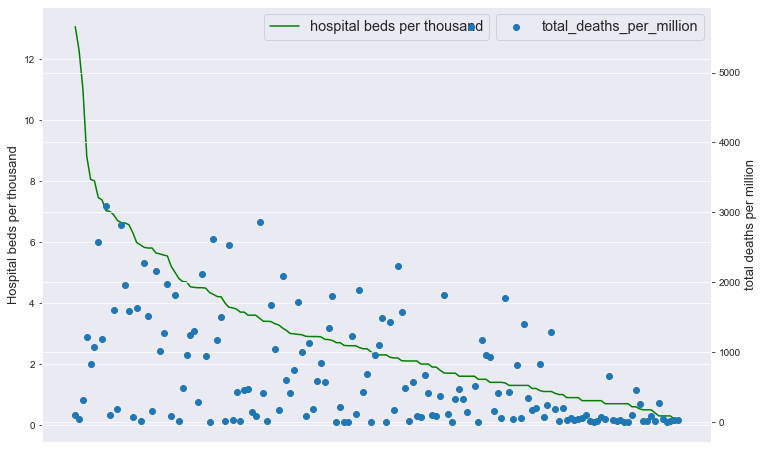

In [62]:
fig, host = plt.subplots(figsize=(12,8))
par1 = host.twinx()

host.set_xlim(auto=True)
host.set_xticks([])
host.set_ylim(auto=True)
par1.set_ylim(auto=True)

host.set_ylabel('Hospital beds per thousand', fontsize=13)
par1.set_ylabel('total deaths per million', fontsize=13)
p1 = host.plot(np.array(hbdf.hospital_beds_per_thousand.values), color='g')
p2 = par1.scatter(x=np.arange(0,len(hbdf)),y=np.array(hbdf.total_deaths_per_million.values))
host.legend(labels=['hospital beds per thousand'], loc='upper center', fontsize='x-large')
par1.legend(labels=['total_deaths_per_million'], loc='upper right', fontsize='x-large')


In [63]:
mdf = hbdf[hbdf.median_age>42]

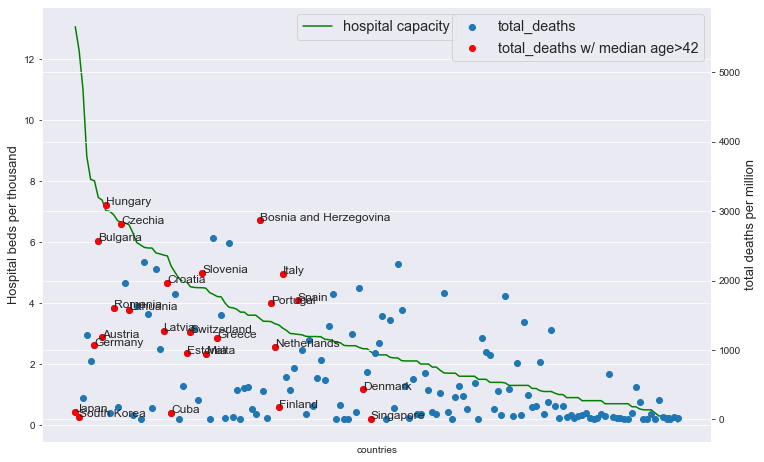

In [64]:
fig, host = plt.subplots(figsize=(12,8))
par1 = host.twinx()

host.set_xlim(auto=True)
host.set_xticks([])
host.set_ylim(auto=True)
par1.set_ylim(auto=True)

host.set_xlabel('countries')
host.set_ylabel('Hospital beds per thousand', fontsize=13)
par1.set_ylabel('total deaths per million', fontsize=13)
p1 = host.plot(np.array(hbdf.hospital_beds_per_thousand.values), color='g')
p2 = par1.scatter(x=np.arange(0,len(hbdf)),y=np.array(hbdf.total_deaths_per_million.values))
p22 = par1.scatter(x=np.array(mdf.index.tolist()), y=np.array(mdf.total_deaths_per_million.values), color='r')
host.legend(labels=['hospital capacity'], loc='upper center', fontsize='x-large')
par1.legend(labels=['total_deaths','total_deaths w/ median age>42'], loc='upper right', fontsize='x-large')

for i in range(mdf.shape[0]):
    plt.annotate(mdf.location.tolist()[i], (mdf.index.tolist()[i], mdf.total_deaths_per_million.tolist()[i]),fontsize=12)

- It may be that beds are most effective after some threshold value. 
    - ie. all countries above 8 beds/thousand have very good COVID19 outcomes, within the same population cohort
- median age and hospital beds per thousand are moderately positively correlated with a pearson coefficient of 0.66

## Female Smokers

In [65]:
fsdf = odf_totalcases.sort_values(by='female_smokers', ascending=False)[['hospital_beds_per_thousand',
                                                                         'total_deaths_per_million',
                                                                         'male_smokers',
                                                                         'female_smokers',
                                                                         'median_age']].dropna()
fsdf.reset_index(inplace=True)

In [66]:
mddf = fsdf[fsdf.median_age>42]

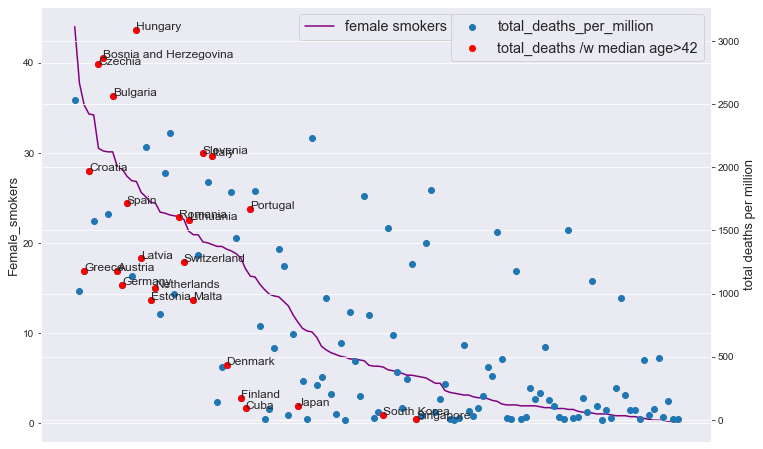

In [67]:
fig, host = plt.subplots(figsize=(12,8))
par1 = host.twinx()

host.set_xlim(auto=True)
host.set_xticks([])
host.set_ylim(auto=True)
par1.set_ylim(auto=True)

host.set_ylabel('Female_smokers', fontsize=13)
par1.set_ylabel('total deaths per million', fontsize=13)
p1 = host.plot(np.array(fsdf.female_smokers.values), color='purple')
p2 = par1.scatter(x=np.arange(0,len(fsdf)),y=np.array(fsdf.total_deaths_per_million.values))
p22 = par1.scatter(x=np.array(mddf.index.tolist()), y=np.array(mddf.total_deaths_per_million.values), color='r')
host.legend(labels=['female smokers'], loc='upper center', fontsize='x-large')
par1.legend(labels=['total_deaths_per_million', 'total_deaths /w median age>42'], loc='upper right', fontsize='x-large')


for i in range(mddf.shape[0]):
    plt.annotate(mddf.location.tolist()[i], (mddf.index.tolist()[i], mddf.total_deaths_per_million.tolist()[i]),fontsize=12)


- female smoker correlation is very strong
- pearson correlation femalesmokers vs total_deaths_per_million = 0.69 which is a strong positive correlation


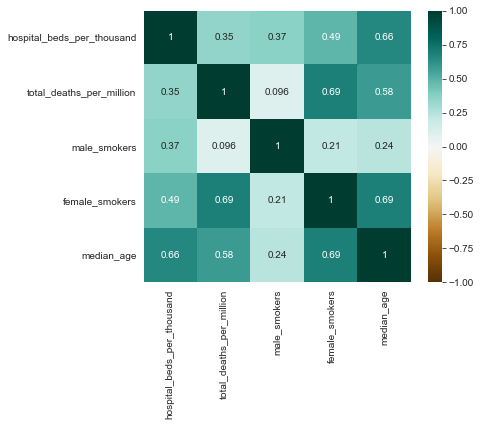

In [68]:
plt.figure(figsize=(6,5))
sns.heatmap(fsdf.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [69]:
msdf = odf_totalcases.sort_values(by='male_smokers', ascending=False)[['hospital_beds_per_thousand',
                                                                       'total_deaths_per_million',
                                                                       'male_smokers',
                                                                       'female_smokers',
                                                                       'gdp_per_capita',
                                                                       'median_age']].dropna()
msdf.reset_index(inplace=True)

In [70]:
mmdf = msdf[msdf.median_age>42]

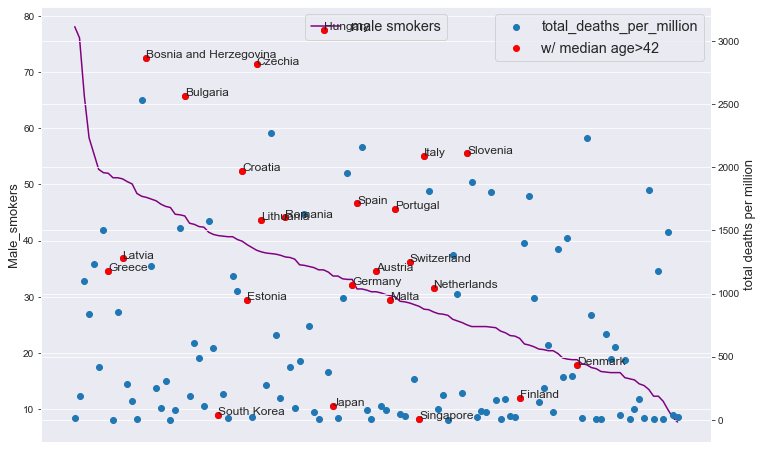

In [71]:
fig, host = plt.subplots(figsize=(12,8))
par1 = host.twinx()

host.set_xlim(auto=True)
host.set_xticks([])
host.set_ylim(auto=True)
par1.set_ylim(auto=True)

host.set_ylabel('Male_smokers', fontsize=13)
par1.set_ylabel('total deaths per million', fontsize=13)
p1 = host.plot(np.array(msdf.male_smokers.values), color='purple')
p2 = par1.scatter(x=np.arange(0,len(msdf)),y=np.array(msdf.total_deaths_per_million.values))
p22 = par1.scatter(x=np.array(mmdf.index.tolist()), y=np.array(mmdf.total_deaths_per_million.values), color='r')
host.legend(labels=['male smokers'], loc='upper center', fontsize='x-large')
par1.legend(labels=['total_deaths_per_million', 'w/ median age>42'], loc='upper right', fontsize='x-large')

for i in range(mmdf.shape[0]):
    plt.annotate(mmdf.location.tolist()[i], (mmdf.index.tolist()[i], mmdf.total_deaths_per_million.tolist()[i]),fontsize=12)

In [72]:
pd.set_option('display.float_format', '{:.2f}'.format)
hbpt = odf_totalcases[odf_totalcases.population.between(100000000,200000000)][['total_deaths_per_million','total_cases_per_million','population','population_density','hospital_beds_per_thousand']].sort_values(by='total_deaths_per_million')

In [73]:
hbpt.sort_values(by='hospital_beds_per_thousand', ascending=False)

total_deaths_per_million  total_cases_per_million   population  \
location                                                                      
Japan                          107.58                  6042.11 126476458.00   
Russia                         836.25                 34786.46 145934460.00   
Egypt                          150.48                  2626.23 102334403.00   
Mexico                        1774.86                 18882.42 128932753.00   
Philippines                    200.48                 11644.38 109581085.00   
Bangladesh                      78.14                  4936.32 164689383.00   
Ethiopia                        36.65                  2374.87 114963583.00   

             population_density  hospital_beds_per_thousand  
location                                                     
Japan                    347.78                       13.05  
Russia                     8.82                        8.05  
Egypt                     98.00                        1.60  
Mexico                    66.44                        1.38  
Philippines              351.87                        1.00  
Bangladesh              1265.04                        0.80  
Ethiopia                 104.96                        0.30

In [74]:
odf_hb7 = odf_totalcases[odf_totalcases.hospital_beds_per_thousand>6]
odf_hb6 = odf_totalcases[odf_totalcases.hospital_beds_per_thousand<6]

top5_hbpt = odf_totalcases.sort_values(by='hospital_beds_per_thousand', ascending=False).head(5).index.tolist()
bot5_hbpt = odf_totalcases.sort_values(by='hospital_beds_per_thousand', ascending=True).head(5).index.tolist()

[Text(0, 0.5, 'Population'),
 Text(0.5, 0, ''),
 Text(0.5, 1.0, 'Total deaths per million')]

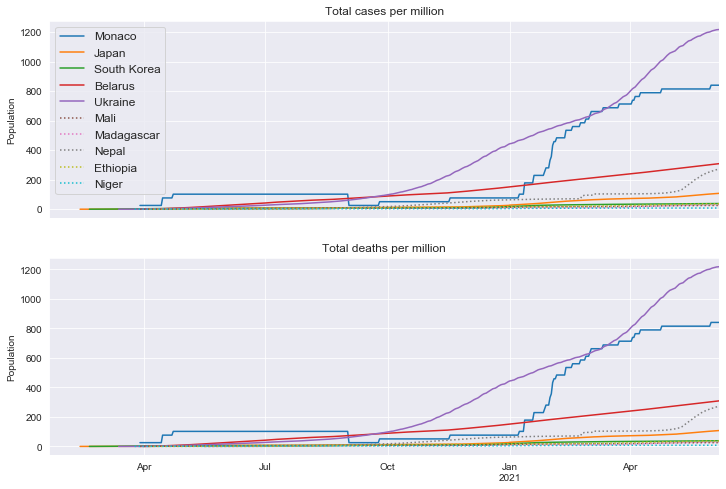

In [75]:
fig, ax = plt.subplots(2,1, figsize=(12,8), sharex=True)

for i in top5_hbpt:
    for x, y in enumerate([df[df.location==i].total_deaths_per_million]):
        y.plot(ax=ax[0], linestyle='-')
for i in bot5_hbpt:
    for x, y in enumerate([df[df.location==i].total_deaths_per_million]):
        y.plot(ax=ax[0], linestyle='dotted')

for i in top5_hbpt:
    for x, y in enumerate([df[df.location==i].total_deaths_per_million]):
        y.plot(ax=ax[1], linestyle='-')
for i in bot5_hbpt:
    for x, y in enumerate([df[df.location==i].total_deaths_per_million]):
        y.plot(ax=ax[1], linestyle='dotted')

ax[0].set(xlabel = '', ylabel='Population', title = 'Total cases per million')  
ax[0].legend(top5_hbpt+bot5_hbpt, fontsize='large')
ax[1].set(xlabel = '', ylabel='Population', title = 'Total deaths per million')  



# Other Correlations

In [76]:
#Removing redundant columns
#some columns are removed due to redundancy
OWIDdf = OWIDdf.drop(columns=['aged_65_older','aged_70_older','iso_code','continent'])

In [77]:
odft=odf_totalcases.copy()
list_ts = [col for col in odft.columns if 'new' in col or 'total' in col or 'people' in col]
odft = odft.drop(columns=['aged_65_older','aged_70_older','iso_code','continent','reproduction_rate','positive_rate','tests_per_case']+list_ts)

In [78]:
odft.describe()

icu_patients  icu_patients_per_million  hosp_patients  \
count         23.00                     23.00          29.00   
mean        2907.39                     76.88       13541.21   
std         6011.70                     38.24       26308.78   
min           39.00                     14.98          80.00   
25%          216.50                     51.54        1155.00   
50%          904.00                     78.72        3284.00   
75%         3064.50                     95.32       10649.00   
max        28889.00                    192.46      133214.00   

       hosp_patients_per_million  weekly_icu_admissions  \
count                      29.00                  15.00   
mean                      549.27                 841.46   
std                       345.66                1316.67   
min                        56.49                   1.45   
25%                       297.45                  19.82   
50%                       555.58                 140.24   
75%                       684.91                 960.62   
max                      1532.57                4002.46   

       weekly_icu_admissions_per_million  weekly_hosp_admissions  \
count                              15.00                   24.00   
mean                               58.71                12559.39   
std                                70.15                25689.26   
min                                 0.27                    5.42   
25%                                27.80                   56.05   
50%                                42.89                  907.90   
75%                                59.49                15494.18   
max                               278.76               116323.00   

       weekly_hosp_admissions_per_million  stringency_index    population  \
count                               24.00            182.00        219.00   
mean                               361.18             83.09   35455761.34   
std                                568.29             14.79  139727481.04   
min                                  1.00             23.15        809.00   
25%                                 73.03             77.78     668110.00   
50%                                215.61             87.04    6524191.00   
75%                                363.22             93.52   24011705.50   
max                               2656.91            100.00 1439323774.00   

       ...  cardiovasc_death_rate  diabetes_prevalence  female_smokers  \
count  ...                 189.00               200.00          145.00   
mean   ...                 264.92                 8.44           10.84   
std    ...                 122.70                 4.89           10.88   
min    ...                  79.37                 0.99            0.10   
25%    ...                 171.28                 5.34            1.90   
50%    ...                 244.66                 7.20            6.30   
75%    ...                 335.35                10.61           19.30   
max    ...                 724.42                30.53           44.00   

       male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
count        143.00                   95.00                      170.00   
mean          32.97                   50.69                        3.03   
std           13.69                   32.28                        2.45   
min            7.70                    1.19                        0.10   
25%           22.10                   20.11                        1.30   
50%           33.10                   49.54                        2.40   
75%           41.40                   82.87                        3.97   
max           78.10                  100.00                       13.80   

       life_expectancy  human_development_index  crude_mortality  \
count           216.00                   188.00           184.00   
mean             73.37                     0.72             0.00   
std               7.52                     0

In [79]:
odft.corr()

icu_patients  icu_patients_per_million  \
icu_patients                                1.00                      0.15   
icu_patients_per_million                    0.15                      1.00   
hosp_patients                               0.98                      0.15   
hosp_patients_per_million                  -0.00                      0.68   
weekly_icu_admissions                       0.90                      0.67   
weekly_icu_admissions_per_million           0.14                      0.72   
weekly_hosp_admissions                      0.90                      0.14   
weekly_hosp_admissions_per_million         -0.02                      0.37   
stringency_index                           -0.09                      0.13   
population                                  0.99                      0.07   
population_density                         -0.13                      0.14   
median_age                                 -0.09                      0.29   
gdp_per_capita                              0.12                     -0.21   
extreme_poverty                             0.08                      0.19   
cardiovasc_death_rate                      -0.09                      0.28   
diabetes_prevalence                         0.43                      0.07   
female_smokers                              0.01                      0.64   
male_smokers                               -0.12                      0.36   
handwashing_facilities                       nan                       nan   
hospital_beds_per_thousand                 -0.09                      0.54   
life_expectancy                            -0.14                     -0.28   
human_development_index                     0.09                     -0.34   
crude_mortality                             0.22                      0.86   
case_fatality                               0.28                      0.26   

                                    hosp_patients  hosp_patients_per_million  \
icu_patients                                 0.98                      -0.00   
icu_patients_per_million                     0.15                       0.68   
hosp_patients                                1.00                       0.08   
hosp_patients_per_million                    0.08                       1.00   
weekly_icu_admissions                        0.88                       0.30   
weekly_icu_admissions_per_million            0.15                       0.45   
weekly_hosp_admissions                       0.99                       0.02   
weekly_hosp_admissions_per_million           0.19                       0.49   
stringency_index                             0.01                       0.17   
population                                   0.97                      -0.06   
population_density                          -0.04                      -0.07   
median_age                                  -0.03                       0.43   
gdp_per_capita                               0.05                      -0.57   
extreme_poverty                              0.45                       0.46   
cardiovasc_death_rate                       -0.12                       0.73   
diabetes_prevalence                          0.40                       0.02   
female_smokers                              -0.01                       0.57   
male_smokers                                -0.11                       0.55   
handwashing_facilities                        nan                        nan   
hospital_beds_per_thousand                  -0.14                       0.73   
life_expectancy                             -0.04                      -0.69   
human_development_index                      0.02                      -0.81   
crude_mortality                              0.28                       0.84   
case_fatality                                0.39                       0.25   

                                    weekly_icu_admissions  \
icu_patients           

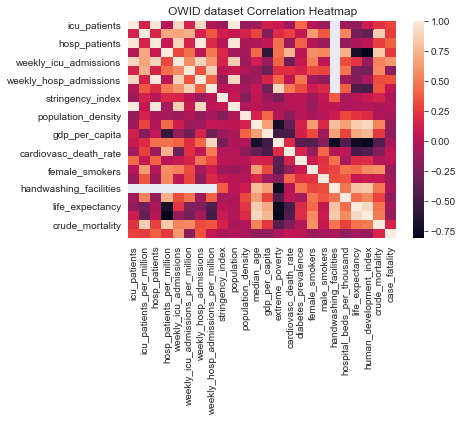

In [80]:
import seaborn as sns

save = sns.heatmap(odft.corr()).set_title('OWID dataset Correlation Heatmap')

#save.figure.savefig('heatmap.png')

Text(0.5, 1, 'Features correlating with total_cases')

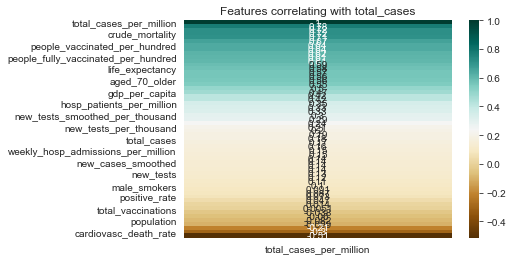

In [81]:
sns.heatmap(odf_totalcases.corr()[['total_cases_per_million']].sort_values(by='total_cases_per_million', ascending=False),
            annot=True, cmap='BrBG').set_title('Features correlating with total_cases')

Text(0.5, 1, 'Features correlating with total_deaths')

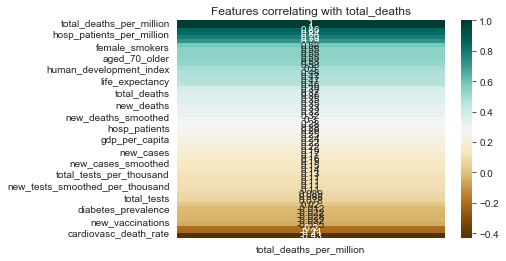

In [82]:
dhmp = sns.heatmap(odf_totalcases.corr()[['total_deaths_per_million']].sort_values(by='total_deaths_per_million', ascending=False), annot=True, cmap='BrBG')
dhmp.set_title('Features correlating with total_deaths')

Some of the target variables to consider: reproduction_rate, total_cases_per_million, total_deaths_per_million.
Normally we would also consider crude mortality rate or case-fatality rate as well. However, confirmed cases is often underreported AND undertested and as such may be harder to evaluate accurately. It is important to consider that the data being robust and accurate relies heavily on the nation's testing capacity. 

Remember that the reproduction rate (R) describes the trajectory of the virus. A value of R = 1 means the amount of new infections and new recoveries are equal; meaning the virus numbers will stagnate. A value of 6.74 means the number of infected is sharply increasing and may lead in a big spike of infections and deaths, depending on government mitigation strategy.

# Bubble Visualizations

In [84]:
odf1 = df.groupby(df['location']).agg(['max'])
odf1.columns = odf1.columns.droplevel(1)
odf1.reset_index(level=0, inplace=True)

In [85]:
odf1 = odf1[odf1.population.notna()]

odf1 = odf1[odf1.total_cases.notna()]

odf1 = odf1[odf1.population_density.notna()]

odf1 = odf1[odf1.human_development_index.notna()]

odf1 = odf1[odf1.gdp_per_capita.notna()]

odf1 = odf1[odf1.total_deaths_per_million.notna()]

odf1 = odf1[odf1.life_expectancy.notna()]

In [86]:
odf1 = odf1[-odf1.location.isin(['World','European Union','North America','South America','Asia','Africa','Europe','Oceania'])]

In [87]:
odfpx = odf1.sort_values(by='population_density', ascending=False).head(10)

In [88]:
px.scatter(odf1, x='life_expectancy',y='human_development_index', size='gdp_per_capita',
           color ='continent', hover_name='location',
           title='HDI vs Life_expectancy vs gdp_per_capita')

In [89]:
px.scatter(odf1, x='life_expectancy',y='human_development_index', size='total_deaths_per_million',
           color ='continent', hover_name='location',
           title='HDI vs Life_expectancy vs dpm')

In [90]:
px.scatter(odf1, x='life_expectancy',y='human_development_index', size='median_age',
           color ='continent', hover_name='location',
           title='HDI vs Life_expectancy vs dpm')

- Countries with lower life expectancy, HDI and GDP tend to fare better against COVID deaths
- Possible reason: GDP, HDI lead to better life expectancy, which leads to higher median age
    - effectively a larger proportion of population is at risk

In [91]:
px.scatter(odf1, x='life_expectancy',y='human_development_index', size='diabetes_prevalence',
           color ='continent', hover_name='location',
           title='HDI vs Life_expectancy vs diabetes')

In [93]:

px.scatter(odf1, x='cardiovasc_death_rate',y='diabetes_prevalence', size='total_deaths_per_million',
           color ='continent', hover_name='location',
           title='cardiovasc vs diabetes vs total_deaths_per_million')

In [94]:
px.scatter(odf1, x='male_smokers',y='female_smokers', size='total_deaths_per_million',
           color ='continent', hover_name='location',
           title='msmoke vs fsmoke vs total_deaths_per_million')

- very strong correlation between female smokers and total dpm

In [95]:
odf1 = odf1[odf1.median_age.notna()]

In [96]:
odf1.sort_values(by='population_density', ascending=False)[['location','population_density']]

location  population_density
183  Singapore             7915.73
92   Hong Kong             7039.71
16     Bahrain             1935.91
127   Maldives             1454.43
129      Malta             1454.04
..         ...                 ...
196   Suriname                3.61
94     Iceland                3.40
12   Australia                3.20
143    Namibia                3.08
137   Mongolia                1.98

[174 rows x 2 columns]

In [97]:
odf1 = odf1[odf1.location!='China']
odf1 = odf1[odf1.location!='India']

In [98]:
px.scatter(odf1, x='population',y='total_deaths_per_million', size='population_density',
           color ='continent', hover_name='location',
           title='population density')

In [101]:
odf_under_50 = odf1[odf1.population < 50000000]

In [102]:
px.scatter(odf_under_50, x='population',y='total_deaths_per_million', size='population_density',
           color ='continent', hover_name='location',
           title='population density')

In [103]:
odfdt_vis = odf1[odf1['handwashing_facilities'].notna()]

In [104]:
px.scatter(odfdt_vis,x='total_deaths_per_million',y='handwashing_facilities',
           color='continent', hover_data=['location'],
           title='Handwashing facilities and crude mortality')

- having more handwashing facilities doesn't necessarily indicate better COVID19 outcomes
- higher proportion of areas with handwashing facilities looks like it is possitively correlated with tdpm

In [105]:
px.scatter(odfdt_vis,x='total_deaths_per_million',y='median_age',
           color='location', hover_data=['location'],
           title='median age and dpm')

- Countries with higher median age are typically hit harder

# Data Mining experimenting

## Random Forest Regressor
- Feature importances help develop a feature profile for the strongest affectors of the pandemic
- RF does not need data normalization as it is a tree-based algorithm; there is no distance function

In [106]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

In [107]:
#removing time-series-attributes
list_nocol = [col for col in df.columns if 'patient' in col
              or 'admissions' in col
              or 'new' in col
              or 'per' in col
              or 'people' in col
              or 'aged' in col
              or 'units' in col]

In [108]:
#removing continents which may overlap data 
cdf = df[-df.location.isin(continents+['World'])]
cdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90694 entries, 2020-02-24 to 2021-06-07
Data columns (total 60 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               90694 non-null  object 
 1   continent                              89705 non-null  object 
 2   location                               90694 non-null  object 
 3   total_cases                            87697 non-null  float64
 4   new_cases                              87690 non-null  float64
 5   new_cases_smoothed                     86722 non-null  float64
 6   total_deaths                           77872 non-null  float64
 7   new_deaths                             77893 non-null  float64
 8   new_deaths_smoothed                    86722 non-null  float64
 9   total_cases_per_million                87210 non-null  float64
 10  new_cases_per_million                  87203 non-null

## RF Importances 

In [109]:
def RFimportances(y, X):
    #Train test split
    train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
    
    #Imputing median in NA
    imp = SimpleImputer(missing_values=np.nan, strategy='median')
    imp = imp.fit(train_X)
    train_X = imp.transform(train_X)

    valimp = SimpleImputer(missing_values=np.nan, strategy='median')
    valimp = valimp.fit(val_X)
    val_X = valimp.transform(val_X)

    val_y = val_y.fillna(val_y.median())
    train_y = train_y.fillna(train_y.median())
    
    #Model fitting
    clf = RandomForestRegressor(n_estimators=100, bootstrap = True, random_state = 1)
    clf = clf.fit(train_X, train_y)
    
    #Model evaluation
    print("Model Evaluation:")
    print('R^2 training set: {:.2f} \nR^2 val set: {:.2f}'.format(clf.score(train_X, train_y),clf.score(val_X, val_y)))
    val_pred = clf.predict(val_X)
    val_mae = mean_absolute_error(val_pred, val_y)
    print("validation MAE: {:,.0f}\n".format(val_mae))

    
    #Feature Importances
    print("Feature Importances")
    importances = clf.feature_importances_
    std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
    indices = np.argsort(importances)[::-1]

    for f in range (train_X.shape[1]):
        featurelist = []
        featurelist.append(X.columns[indices[f]])
        print(f"{X.columns.get_loc(X.columns[indices[f]])}\t"
              f"{X.columns[indices[f]]} "
              f"{importances[indices[f]]:.4f}")

    plt.figure(figsize=(12,8))
    plt.title("Feature importances")
    plt.bar(np.arange(len(importances[indices])),importances[indices],
            color="r", yerr=std[indices], align="center")
    plt.xticks(range(train_X.shape[1]), indices)
    plt.xlim([-1, train_X.shape[1]])
    plt.show()
    
    #Permutation importances
    print('Permutation Importances')
    a,c = [],[]
    r = permutation_importance(clf, val_X, val_y)
    for i in r.importances_mean.argsort()[::-1]:
        if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
            a.append(r.importances_mean[i])
            c.append(r.importances_std[i])
            print(f"{i+1} \t"
                  f"{X.columns[i]:<8} \t"
                  f"{r.importances_mean[i]:.3f}"
                  f" +/- {r.importances_std[i]:.3f}")

    plt.figure(figsize=(12,8))
    plt.title("Permutation importances")
    plt.bar(np.arange(len(a)), a, yerr=c, color="r", align="center")
    plt.xticks(np.arange(len(a)))
    plt.show()

## Target variable: total_deaths

In [110]:
y = df.total_deaths
X = df[df.columns.difference(list_nocol+['iso_code','location','continent','crude_mortality','case_fatality','total_deaths','positive_rate','population','total_cases','tests_units'])] 

Model Evaluation:
R^2 training set: 0.96 
R^2 val set: 0.92
validation MAE: 6,586

Feature Importances
13	total_vaccinations 0.4544
4	handwashing_facilities 0.3369
2	extreme_poverty 0.0541
0	cardiovasc_death_rate 0.0384
9	population_density 0.0292
10	reproduction_rate 0.0242
5	human_development_index 0.0181
12	total_tests 0.0139
6	life_expectancy 0.0092
3	female_smokers 0.0058
1	diabetes_prevalence 0.0054
7	male_smokers 0.0045
8	median_age 0.0044
11	stringency_index 0.0017


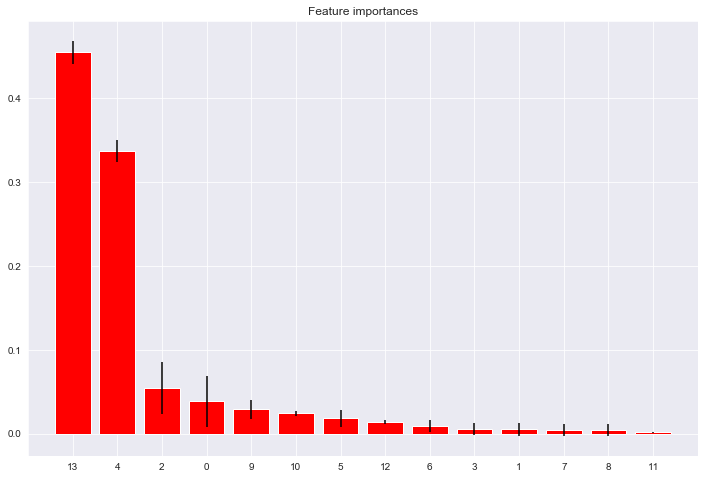

Permutation Importances
14 	total_vaccinations 	2.175 +/- 0.109
3 	extreme_poverty 	0.598 +/- 0.018
5 	handwashing_facilities 	0.566 +/- 0.061
6 	human_development_index 	0.189 +/- 0.004
13 	total_tests 	0.121 +/- 0.006
9 	median_age 	0.121 +/- 0.002
1 	cardiovasc_death_rate 	0.082 +/- 0.002
11 	reproduction_rate 	0.061 +/- 0.006
10 	population_density 	0.051 +/- 0.003
7 	life_expectancy 	0.015 +/- 0.001
4 	female_smokers 	0.009 +/- 0.001
2 	diabetes_prevalence 	0.006 +/- 0.001
8 	male_smokers 	0.004 +/- 0.001
12 	stringency_index 	0.004 +/- 0.000


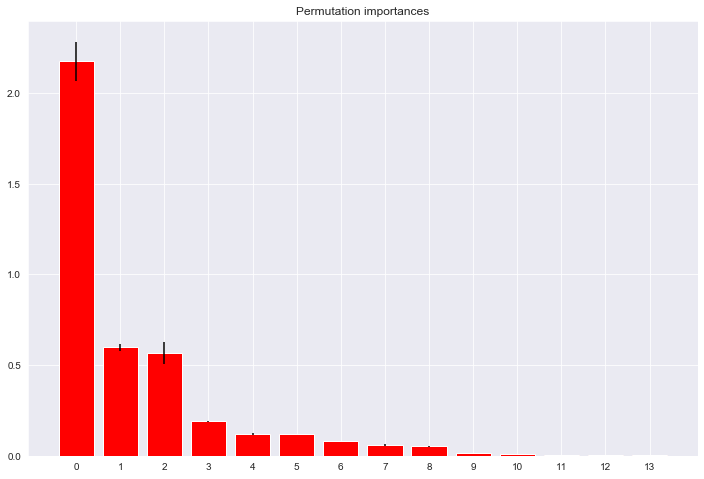

In [111]:
RFimportances(y, X)

## Target variable: total_cases

In [112]:
y = df.total_cases
X = df[df.columns.difference(list_nocol+['iso_code','location','continent','crude_mortality','case_fatality','total_deaths','positive_rate','population','total_cases','tests_units'])] 

Model Evaluation:
R^2 training set: 0.97 
R^2 val set: 0.94
validation MAE: 242,998

Feature Importances
13	total_vaccinations 0.5116
4	handwashing_facilities 0.3200
2	extreme_poverty 0.0652
12	total_tests 0.0202
5	human_development_index 0.0187
10	reproduction_rate 0.0149
8	median_age 0.0148
9	population_density 0.0074
6	life_expectancy 0.0073
7	male_smokers 0.0065
0	cardiovasc_death_rate 0.0050
3	female_smokers 0.0036
1	diabetes_prevalence 0.0029
11	stringency_index 0.0018


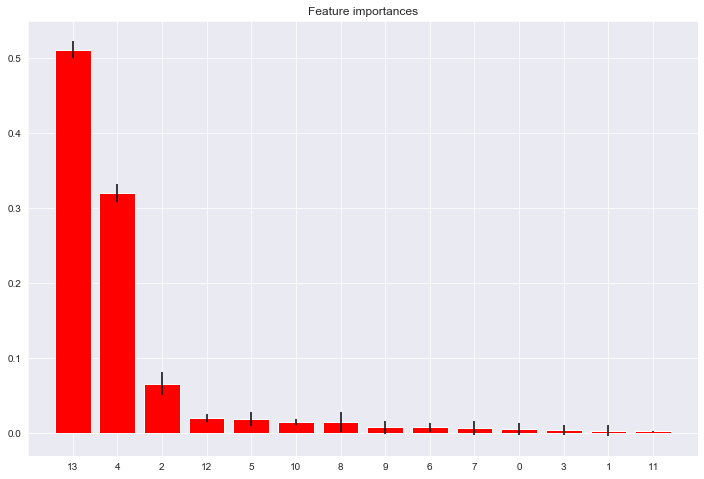

Permutation Importances
14 	total_vaccinations 	2.263 +/- 0.066
3 	extreme_poverty 	1.076 +/- 0.012
9 	median_age 	0.652 +/- 0.007
5 	handwashing_facilities 	0.469 +/- 0.053
6 	human_development_index 	0.211 +/- 0.009
13 	total_tests 	0.174 +/- 0.004
11 	reproduction_rate 	0.035 +/- 0.003
7 	life_expectancy 	0.018 +/- 0.001
1 	cardiovasc_death_rate 	0.007 +/- 0.001
4 	female_smokers 	0.005 +/- 0.000
12 	stringency_index 	0.004 +/- 0.000
10 	population_density 	0.003 +/- 0.001
8 	male_smokers 	0.003 +/- 0.001


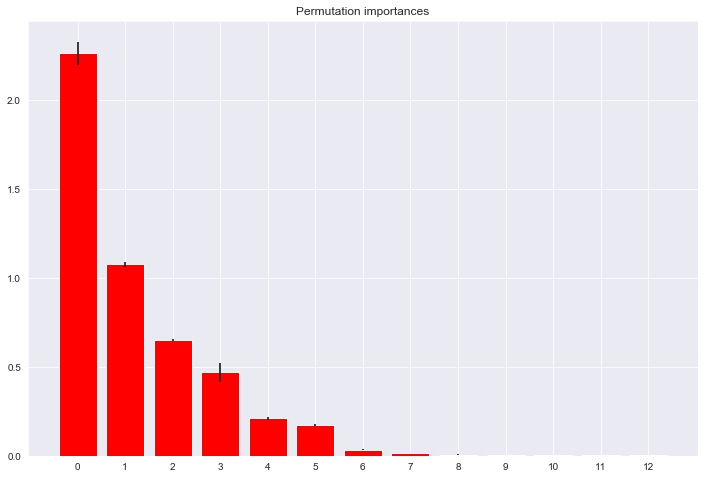

In [113]:
RFimportances(y, X)

- Testing is a special case; it doesn't necessarily affect COVID19 spread but affects our view of the data. 
- Each region has different testing regimes and capacity; therefore confirmed cases may not reflect the true number of COVID19 cases. Higher testing capacity will also mean more total cases.

## Crude-Mortality
- weak model

Model Evaluation:
R^2 training set: 0.98 
R^2 val set: -0.43
validation MAE: 0

Feature Importances
13	total_vaccinations 0.2982
3	female_smokers 0.1547
12	total_tests 0.0827
11	stringency_index 0.0763
6	life_expectancy 0.0691
9	population_density 0.0562
5	human_development_index 0.0541
10	reproduction_rate 0.0433
2	extreme_poverty 0.0430
0	cardiovasc_death_rate 0.0366
7	male_smokers 0.0315
1	diabetes_prevalence 0.0256
8	median_age 0.0212
4	handwashing_facilities 0.0073


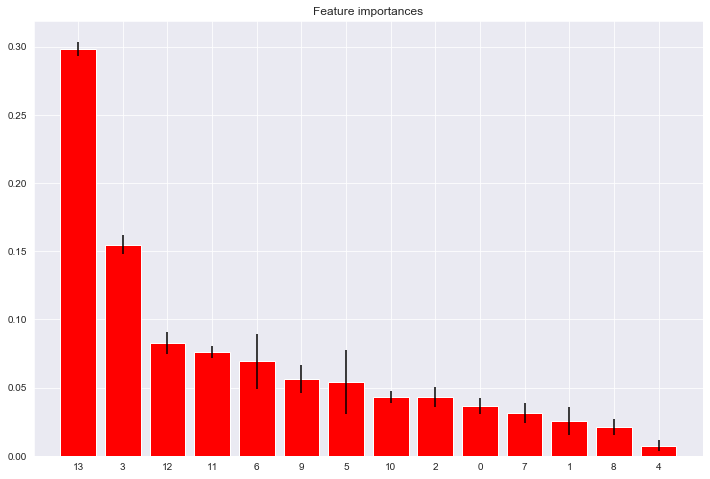

Permutation Importances
4 	female_smokers 	1.271 +/- 0.019
7 	life_expectancy 	0.454 +/- 0.010
9 	median_age 	0.353 +/- 0.008
3 	extreme_poverty 	0.250 +/- 0.005
6 	human_development_index 	0.181 +/- 0.004
8 	male_smokers 	0.149 +/- 0.004
14 	total_vaccinations 	0.148 +/- 0.009
10 	population_density 	0.121 +/- 0.004
13 	total_tests 	0.073 +/- 0.002
1 	cardiovasc_death_rate 	0.039 +/- 0.003
11 	reproduction_rate 	0.019 +/- 0.001


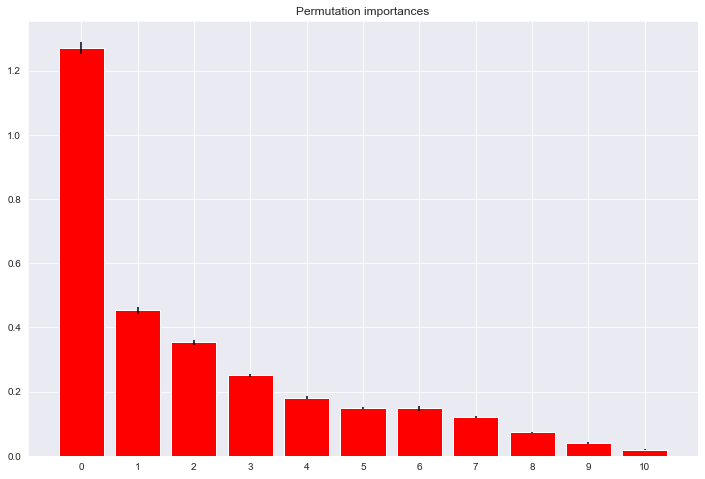

In [266]:
y = df.crude_mortality
X = df[df.columns.difference(list_nocol+['iso_code','location','continent','crude_mortality','case_fatality','total_deaths','positive_rate','population','total_cases','tests_units'])]
RFimportances(y, X)

## Case Fatality
- weak model 

Model Evaluation:
R^2 training set: 0.93 
R^2 val set: 0.71
validation MAE: 0

Feature Importances
11	stringency_index 0.2280
0	cardiovasc_death_rate 0.1080
3	female_smokers 0.1006
10	reproduction_rate 0.0980
1	diabetes_prevalence 0.0801
12	total_tests 0.0788
5	human_development_index 0.0672
8	median_age 0.0571
6	life_expectancy 0.0434
9	population_density 0.0385
7	male_smokers 0.0313
4	handwashing_facilities 0.0260
13	total_vaccinations 0.0216
2	extreme_poverty 0.0215


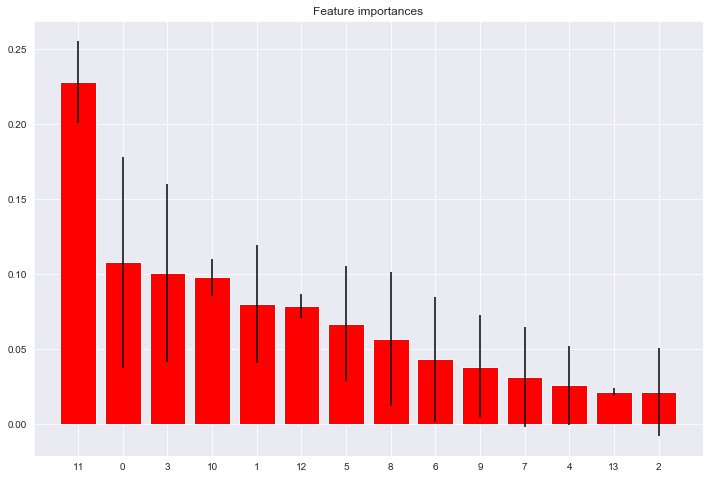

Permutation Importances
6 	human_development_index 	0.683 +/- 0.005
12 	stringency_index 	0.420 +/- 0.025
4 	female_smokers 	0.291 +/- 0.011
1 	cardiovasc_death_rate 	0.247 +/- 0.007
10 	population_density 	0.223 +/- 0.009
2 	diabetes_prevalence 	0.153 +/- 0.039
9 	median_age 	0.141 +/- 0.005
13 	total_tests 	0.126 +/- 0.007
11 	reproduction_rate 	0.104 +/- 0.014
7 	life_expectancy 	0.067 +/- 0.005
5 	handwashing_facilities 	0.049 +/- 0.003
3 	extreme_poverty 	0.037 +/- 0.005
8 	male_smokers 	0.015 +/- 0.001
14 	total_vaccinations 	0.009 +/- 0.000


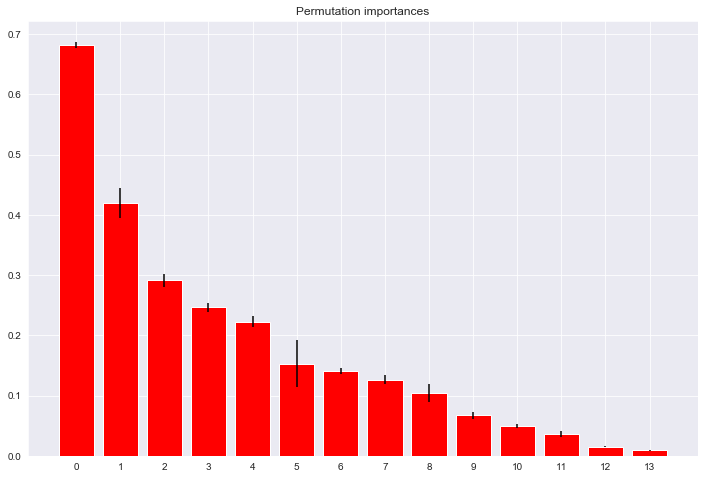

In [267]:
y = df.case_fatality
X = df[df.columns.difference(list_nocol+['iso_code','location','continent','crude_mortality','case_fatality','total_deaths','positive_rate','population','total_cases','tests_units'])]
RFimportances(y, X)

# ARIMA forecasting model
- arima will be used to forecast deaths and cases for the next 30 days in Canada
- pdq parameters will be tuned using an optimization for AIC
    - source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7409837/
    - this method tests combinations of pdq values for the lowest AIC

In [128]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa import stattools
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox

## ARIMA preprocessing

In [122]:
df.describe()

total_cases  new_cases  new_cases_smoothed  total_deaths  new_deaths  \
count     91157.00   91154.00            90144.00      81202.00    81357.00   
mean     970563.78    6057.92             6087.66      26787.14      146.73   
std     6688871.69   38106.76            37864.64     159486.95      801.68   
min           1.00  -74347.00            -6223.00          1.00    -1918.00   
25%        1124.00       2.00                7.29         51.00        0.00   
50%       12418.00      72.00               89.57        349.00        2.00   
75%      131079.00     794.00              833.75       3409.75       18.00   
max   173631266.00  906008.00           826389.57    3736961.00    18051.00   

       new_deaths_smoothed  total_cases_per_million  new_cases_per_million  \
count             90144.00                 90670.00               90667.00   
mean                131.54                 11922.57                  76.13   
std                 743.18                 22330.82                 198.23   
min                -232.14                     0.00               -2153.44   
25%                   0.00                   236.10                   0.21   
50%                   1.29                  1605.37                   8.07   
75%                  14.14                 12064.42                  70.60   
max               14741.14                178308.42               18293.67   

       new_cases_smoothed_per_million  total_deaths_per_million  ...  \
count                        89662.00                  80728.00  ...   
mean                            76.44                    267.84  ...   
std                            158.75                    490.23  ...   
min                           -276.82                      0.00  ...   
25%                              1.25                      7.66  ...   
50%                             10.69                     47.39  ...   
75%                             79.35                    288.41  ...   
max                           4083.50                   5656.67  ...   

       cardiovasc_death_rate  diabetes_prevalence  female_smokers  \
count               84832.00             86844.00        66388.00   
mean                  258.21                 7.90           10.54   
std                   118.92                 4.10           10.43   
min                    79.37                 0.99            0.10   
25%                   167.29                 5.31            1.90   
50%                   242.65                 7.11            6.30   
75%                   329.63                10.08           19.30   
max                   724.42                30.53           44.00   

       male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
count      65415.00                42618.00                    77320.00   
mean          32.68                   50.86                        3.03   
std           13.48                   31.76                        2.46   
min            7.70                    1.19                        0.10   
25%           21.60                   20.86                        1.30   
50%           31.40                   49.84                        2.40   
75%           41.10                   83.24                        3.86   
max           78.10                  100.00                       13.80   

       life_expectancy  human_development_index  crude_mortality  \
count         89407.00                 85003.00         80728.00   
mean             73.23                     0.73             0.00   
std               7.56                     0.15             0.00   
min              53.28                     0.39             0.00   
25%              67.92                     0.60             0.00   
50%              74.62                     0.75             0.00   
75%              78.74                     0.85             0.00   
max              86.75                     0.96             0.01   

       case_fatality  
count    

In [123]:
#rolling average for each variable
def cra(country,case='total_cases'):
    ts=df.loc[(df['location']==country)]  
    ts=ts[[case]]
    a=len(ts.loc[(ts[case]>=10)])
    ts=ts[-a:]
    ts.astype('int64')
    return (ts.rolling(window=7,center=False).mean().dropna())


def crplot(country, case='total_cases'):
    ts=df.loc[(df['location']==country)]  
    ts=ts[[case]]
    a=len(ts.loc[(ts[case]>=10)])
    ts=ts[-a:]
    ts.astype('int64')
    
    plt.figure(figsize=(16,6))
    plt.plot(ts[case])
    plt.plot(ts.rolling(window=7,center=False).mean().dropna(),label='Rolling Mean')
    plt.legend(['Cases', 'Rolling Mean'])
    plt.title(f'{country}: Rolling mean and cases for {case}')

## Stationarity testing

In [124]:
c1 = cra('Canada',case='total_cases')

In [125]:
def stationarity(ts):
    print('Augmented Dickey-Fuller test: Canada\'s total_cases')
    test = adfuller(ts, autolag='AIC')
    results = pd.Series(test[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations'])
    print(results)

stationarity(c1.total_cases.values)

Augmented Dickey-Fuller test: Canada's total_cases
Test Statistic             0.40
p-value                    0.98
Lags Used                 16.00
Number of Observations   447.00
dtype: float64


The p-value tells us the likelihood of stationarity. Because this p-value is over the alpha limit, we cannot reject the null hypothesis that the data contains a unit root, and the data may be non-stationary. 
ARIMA is a good model in this case, with differencing.

Augmented Dickey-Fuller test: Canada's total_cases
Test Statistic             0.40
p-value                    0.98
Lags Used                 16.00
Number of Observations   447.00
dtype: float64


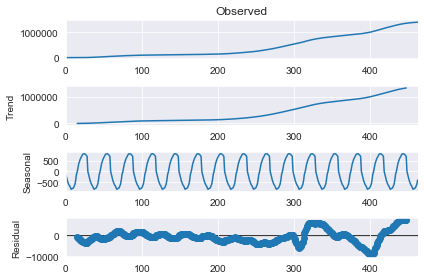

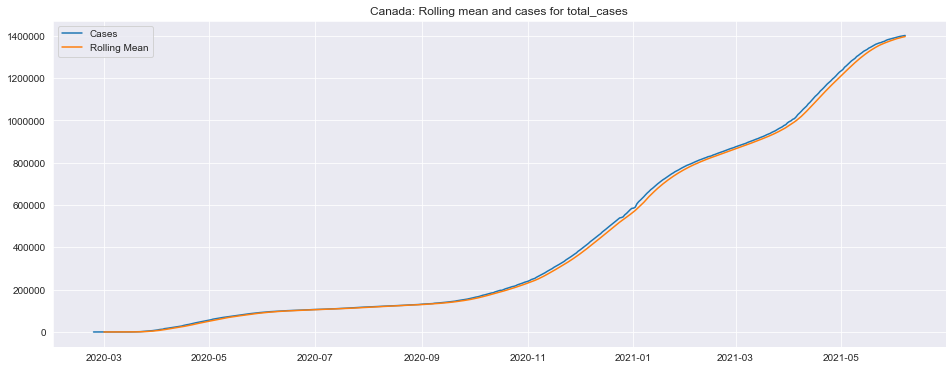

In [129]:
stationarity(cra('Canada').total_cases.values)
fig = statsmodels.tsa.seasonal.seasonal_decompose(cra('Canada').values, period = 30).plot()
crplot('Canada')

## ACF and PACF

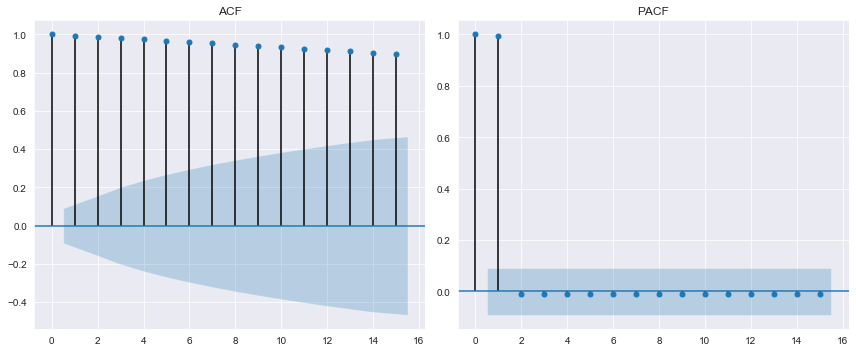

In [132]:
def autocorr(ts):
    plt.figure(figsize=(12,5))
    layout = (1, 2)
    
    ax_acf= plt.subplot2grid(layout, (0, 0))
    ax_pacf = plt.subplot2grid(layout, (0, 1))
    
    plot_acf(ts, lags=15, title='ACF', ax=ax_acf)
    plot_pacf(ts, lags=15, title='PACF', ax=ax_pacf)
    plt.tight_layout()
    
autocorr(cra('Canada'))
#ACF and PACF for Canada;

- normally ACF helps determine q and PACF determines p, but I will be using a function to optimize AIC to deliver best results
- these figures are still useful to determine range for itertools combinations

## ARIMA Modeling
- predictions using the model will be 30 days from today

In [193]:
#Train-test splitting on time series data
import itertools
from sklearn.metrics import mean_squared_error

def split(ts):
    date = int(len(ts) * 0.85)
    train = ts[:date]
    test = ts[date:]
    return(train, test)

#(p,D,q) hyperparameter evaluation based on AIC
def arima(ts,test):
    p = d = q = range(0,5)
    x = 100000
    pdq = list(itertools.product(p,d,q))
    
    for combo in pdq:
        try:
            model = ARIMA(ts, order=combo)
            result = model.fit()
            if (result.aic <= x):
                x = result.aic
                param = combo
        except:
            continue
    return param

def rmse(y1, y_pred):
    y1, y_pred = np.array(y1), np.array(y_pred)
    return np.sqrt(mean_squared_error(y1, y_pred))

def mape(y1, y_pred): 
    y1, y_pred = np.array(y1), np.array(y_pred)
    return np.mean(np.abs((y1 - y_pred) / y1)) * 100

def ARIMAmodel(country, case):
    c1 = cra(country, case)
    series = c1[case].values
    train,test=split(series)
    pdq = arima(train,test)

    #Modeling
    model = ARIMA(train, order=pdq)
    result = model.fit()
    return result

In [184]:
def ARIMAfigs(result, case, days = 30):
    
    c = cra('Canada',case=case)
    train, test = split(c[case].values)
    z, y = np.hstack(train), np.hstack(test)
    length = len(z) + len(y)
    zy = pd.DataFrame({'x':range(len(z)-10,len(z)+len(y)-10), 'y':y})
    zy.set_index('x', inplace=True)
    
    plt.figure(figsize=(15,10))
    layout=(1,1)

    #days forecasted
    forecast = plt.subplot2grid(layout, (0,0))
    plt.setp(forecast, 
             xticks=[0, length/5, (length/5)*2, (length/5)*3, (length/5)*4, length-10, length+days],
             xticklabels=[str(c.index.min())[:10], '', '', '', '', str(c.index.max())[:10], '']
            )
    
    #Predict the test set + next 30 days
    result.plot_predict(start=10, end=length+days, ax=forecast)
    forecast.legend(fontsize='xx-large', loc='upper left')
    forecast.tick_params(axis='x', labelsize=15)
    forecast.tick_params(axis='y', labelsize=13)
    forecast.set_ylabel(f'COVID19 {case}', fontsize=15)
    forecast.set_title(f'ARIMA Model Predictions for COVID19 {case} in Canada', fontsize=20 )
    pred=result.forecast(steps=len(test))[0]
    
    #Model Error plots
    fig, ax = plt.subplots(1, 2, figsize=(16,4))

    ax[0].plot(pred, c='#1f77b4', label = 'Predicted')
    ax[0].plot(test, c='r', label = 'Actual')
    forecast.plot(zy, c='r', label = 'Actual')
    ax[1].plot(pred-y, c='purple', label = 'Residuals', marker='*')
    plt.setp(ax[0], xticks=[0, len(pred)], xticklabels=[str(c.index[len(z)+1])[:10], str(c.index.max())[:10]])
    ax[1].tick_params(axis='x', labelsize=13)
    fig.suptitle('ARIMA Model error', fontsize=20 )
    
    ax[1].annotate(f"RMSE:{rmse(test,pred):.3f}\nMAPE:{mape(test,pred):.3f}\n",
                   xy=(0.05, 0.55), fontsize=15,
                   xycoords = 'axes fraction', xytext=(0.05,0.55))
    
    forecast.legend(['Forecast', 'Actual', 'Actual(test set)', '95% CI'], loc = 'upper left', fontsize='xx-large')
    ax[0].legend(loc='upper left', fontsize='x-large')
    ax[1].legend(loc='upper left', fontsize='x-large')
    
    #creating the predictions list
    datelist = pd.date_range(c.index.max(), periods=days).tolist()
    dates = []
    for date in datelist:
        dates.append(str(date)[:10])
    oospred = result.forecast(steps=len(test)+days)[0]
    fpreds = pd.DataFrame({'Date':dates,'OOS Preds':oospred[len(test):]})
    
    print(result.summary(), '\n')
    print('Evaluation metrics:\n'
          f"RMSE:{rmse(test,pred):.3f}\n"
          f"MAPE:{mape(test,pred):.3f}\n")
    print(f'{days} day predictions\n', fpreds)

In [194]:
import warnings
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.simplefilter('ignore', HessianInversionWarning)
warnings.simplefilter('ignore', RuntimeWarning)

model_td = ARIMAmodel(country='Canada', case='total_deaths')
model_tc = ARIMAmodel(country='Canada', case='total_cases')

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                  401
Model:                 ARIMA(2, 2, 3)   Log Likelihood               -2565.141
Method:                       css-mle   S.D. of innovations            144.953
Date:                Tue, 08 Jun 2021   AIC                           5144.283
Time:                        20:33:48   BIC                           5172.240
Sample:                             2   HQIC                          5155.353
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.0694     15.554      1.162      0.245     -12.416      48.555
ar.L1.D2.y     0.9933      0.105      9.435      0.000       0.787       1.200
ar.L2.D2.y    -0.2121      0.095     -2.229      0.0

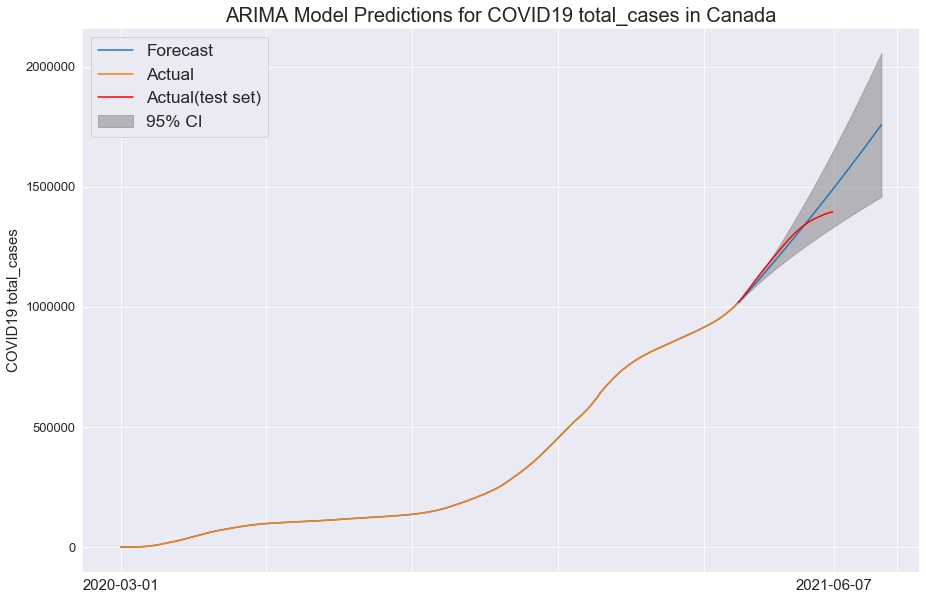

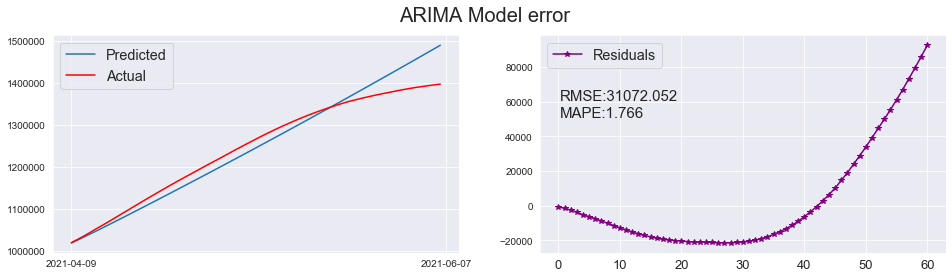

In [195]:
ARIMAfigs(model_tc, case='total_cases')

- a polynomial model would be useful for this problem

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                  381
Model:                 ARIMA(3, 2, 3)   Log Likelihood                -979.774
Method:                       css-mle   S.D. of innovations              3.134
Date:                Tue, 08 Jun 2021   AIC                           1975.549
Time:                        20:34:13   BIC                           2007.091
Sample:                             2   HQIC                          1988.064
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2637      0.848      0.311      0.756      -1.398       1.925
ar.L1.D2.y     0.4477      0.052      8.554      0.000       0.345       0.550
ar.L2.D2.y    -0.2021      0.047     -4.269      0.0

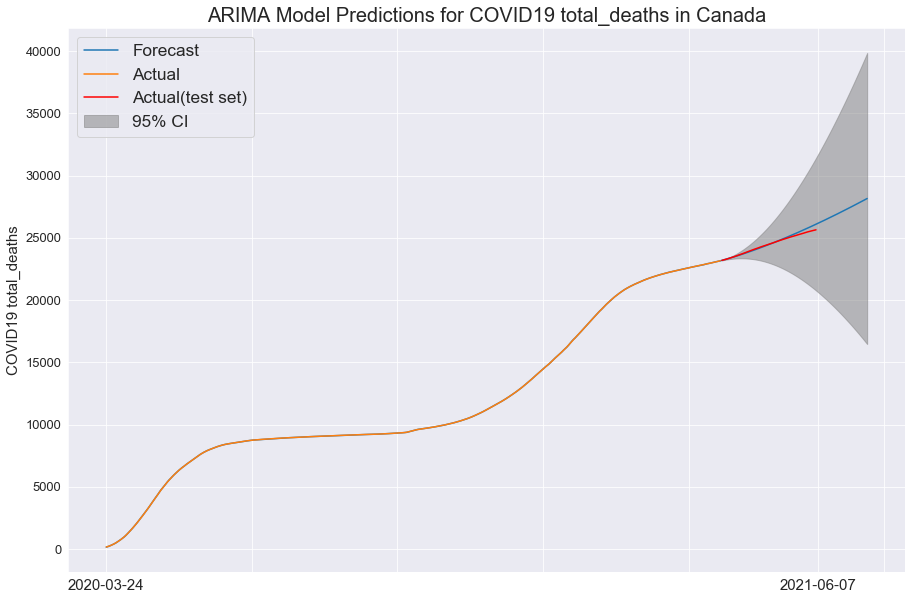

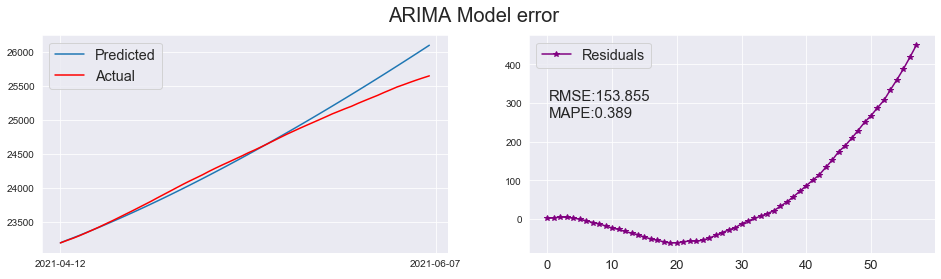

In [196]:
ARIMAfigs(model_td, case='total_deaths')

- The ARIMA(5,2,5) for cases and ARIMA(5,2,4) for deaths were relatively robust for the first 30 days and predicted the trajectory of COVID19 with moderate succuss
- ARIMA as a simple model is a robust forecast in some areas but does not account for randomness or erratic behavior as observed with COVID waves and spikes

# Summary
Analysis of pandemic data is crucial for preparation of the next pandemic event.
- Strongest demographic factors for COVID19 outcomes are median age, female smoker population, population density. 
- Key mitigators may be hospital beds per thousand, and total vaccinations.
- It is important to note that total testing's high correlation to target variables is because testing reveals true cases. Total cases may not be an accurate indicator of true cases because testing capacity and rate differs between regions. In general, it is better to focus on a crude mortality rate instead of case-fatality rate or metrics derived from total cases. 


# Dashboard visualization using Dash and plotly_express libraries
- work in progress

In [15]:
from jupyter_dash import JupyterDash
from dash.dependencies import Input, Output
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px

In [16]:
list(df.columns[4:16])

['new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'reproduction_rate']

In [17]:
np.array(cf.columns[4:16])

array(['new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate'],
      dtype=object)

In [19]:
cf_array = np.array(cf)

In [42]:
#learning dash, ignore for now
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = JupyterDash(__name__, external_stylesheets=external_stylesheets)

df = pd.read_csv('https://plotly.github.io/datasets/country_indicators.csv')

#available_indicators = df['Indicator Name'].unique()
#available_indicators = np.array(cf.columns[4:16])

app.layout = html.Div([
    html.Div([

# x axis crossfilter
#         html.Div([
#             dcc.Dropdown(
#                 id='crossfilter-xaxis-column',
#                 options=[{'label': i, 'value': i} for i in available_indicators],
#                 value='Fertility rate, total (births per woman)'
#             ),
#             dcc.RadioItems(
#                 id='crossfilter-xaxis-type',
#                 options=[{'label': i, 'value': i} for i in ['Linear', 'Log']],
#                 value='Linear',
#                 labelStyle={'display': 'inline-block'}
#             )
#         ],
#         style={'width': '49%', 'display': 'inline-block'}),

        html.Div([
            dcc.Dropdown(
                id='crossfilter-yaxis-column',
                options=[{'label': i, 'value': i} for i in available_indicators],
                value='Life expectancy at birth, total (years)'
            ),
            dcc.RadioItems(
                id='crossfilter-yaxis-type',
                options=[{'label': i, 'value': i} for i in ['Linear', 'Log']],
                value='Linear',
                labelStyle={'display': 'inline-block'}
            )
        ], style={'width': '49%', 'float': 'right', 'display': 'inline-block'})
    ], style={
        'borderBottom': 'thin lightgrey solid',
        'backgroundColor': 'rgb(250, 250, 250)',
        'padding': '10px 5px'
    }),

    html.Div([
        dcc.Graph(
            id='crossfilter-indicator-scatter',
            hoverData={'points': [{'customdata': 'Japan'}]}
        )
    ], style={'width': '49%', 'display': 'inline-block', 'padding': '0 20'}),
    html.Div([
        dcc.Graph(id='x-time-series'),
        dcc.Graph(id='y-time-series'),
    ], style={'display': 'inline-block', 'width': '49%'}),

#     html.Div(dcc.Slider(
#         id='crossfilter-year--slider',
#         min=df['Year'].min(),
#         max=df['Year'].max(),
#         value=df['Year'].max(),
#         marks={str(year): str(year) for year in df['Year'].unique()},
#         step=None
#     ), style={'width': '49%', 'padding': '0px 20px 20px 20px'})
])


@app.callback(
    Output('crossfilter-indicator-scatter', 'figure'),
    [Input('crossfilter-xaxis-column', 'value'),
     Input('crossfilter-yaxis-column', 'value'),
     Input('crossfilter-xaxis-type', 'value'),
     Input('crossfilter-yaxis-type', 'value'),
     Input('crossfilter-year--slider', 'value')])
def update_graph(xaxis_column_name, yaxis_column_name,
                 xaxis_type, yaxis_type,
                 year_value):
    dff = df[df['Year'] == year_value]

    fig = px.scatter(x=dff[dff['Indicator Name'] == xaxis_column_name]['Value'],
            y=dff[dff['Indicator Name'] == yaxis_column_name]['Value'],
            hover_name=dff[dff['Indicator Name'] == yaxis_column_name]['Country Name']
            )

    fig.update_traces(customdata=dff[dff['Indicator Name'] == yaxis_column_name]['Country Name'])

    fig.update_xaxes(title=xaxis_column_name, type='linear' if xaxis_type == 'Linear' else 'log')

    fig.update_yaxes(title=yaxis_column_name, type='linear' if yaxis_type == 'Linear' else 'log')

    fig.update_layout(margin={'l': 40, 'b': 40, 't': 10, 'r': 0}, hovermode='closest')

    return fig


def create_time_series(dff, axis_type, title):

    fig = px.scatter(dff, x='Year', y='Value')

    fig.update_traces(mode='lines+markers')

    fig.update_xaxes(showgrid=False)

    fig.update_yaxes(type='linear' if axis_type == 'Linear' else 'log')

    fig.add_annotation(x=0, y=0.85, xanchor='left', yanchor='bottom',
                       xref='paper', yref='paper', showarrow=False, align='left',
                       bgcolor='rgba(255, 255, 255, 0.5)', text=title)

    fig.update_layout(height=225, margin={'l': 20, 'b': 30, 'r': 10, 't': 10})

    return fig


@app.callback(
    Output('x-time-series', 'figure'),
    [Input('crossfilter-indicator-scatter', 'hoverData'),
     Input('crossfilter-xaxis-column', 'value'),
     Input('crossfilter-xaxis-type', 'value')])
def update_y_timeseries(hoverData, xaxis_column_name, axis_type):
    country_name = hoverData['points'][0]['customdata']
    dff = df[df['Country Name'] == country_name]
    dff = dff[dff['Indicator Name'] == xaxis_column_name]
    title = '<b>{}</b><br>{}'.format(country_name, xaxis_column_name)
    return create_time_series(dff, axis_type, title)


@app.callback(
    Output('y-time-series', 'figure'),
    [Input('crossfilter-indicator-scatter', 'hoverData'),
     Input('crossfilter-yaxis-column', 'value'),
     Input('crossfilter-yaxis-type', 'value')])
def update_x_timeseries(hoverData, yaxis_column_name, axis_type):
    dff = df[df['Country Name'] == hoverData['points'][0]['customdata']]
    dff = dff[dff['Indicator Name'] == yaxis_column_name]
    return create_time_series(dff, axis_type, yaxis_column_name)


app.run_server(mode='inline')

Dash app running on http://127.0.0.1:8050/
